<hr style="border:1px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> FUNDAMENTOS MATEMATICOS PARA INTELIGENCIA ARTIFICIAL</h1></center> 
<center><h1 style="color:#173F8A;"> IMT 3850 </h1></center>
<hr style="border:1px solid #FEC60D"> </hr>
<center><h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br></h3></center>
<h3 style="color:#03122E;text-align:right;"> Magister en Inteligencia Artificial - MIA <br> Instituto de Ingenieria Matematica y Computacional - IMC<br>  Pontificia Universidad Catolica de Chile<br>   </h3>




<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->



<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal para IA - clase 4</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

**Tabla de contenidos**
1. [Ejemplo: Calculo de SVD](#Ejemplo:-Calculo-de-SVD)
2. [Ejemplo: Regresion unidimensional](#Ejemplo:-Regresion-1d)
3. [Ejemplo: Compresion de imagen real con SVD](#Ejemplo:-Compresion-de-imagenes-con-SVD-2)
4. [Ejemplo: Compresion de imagen real color con SVD](#Ejemplo:-Compresion-de-imagenes-con-SVD-2-color)
5. [Ejemplo: Analisis de componentes principales - toy problem](#Ejemplo:-Analisis-de-componentes-principales-1)
6. [Ejemplo: Analisis de componentes principales - base de datos cancer de ovarios](#Ejemplo:-Analisis-de-componentes-principales-1)
7. [Ejemplo: Analisis de componentes principales - Eigenfaces](#Ejemplo:-Analisis-de-componentes-principales-1) 
8. [Algoritmos para resolver minimos cuadrados](#Algoritmos-para-resolver-minimos-cuadrados)
9. [Ejemplo: minimos cuadrados](#Ejemplo:-minimos-cuadrados)
10. [# Ejemplo: Ajuste polinomial](#Ejemplo:-Ajuste-polinomial)
11. [Ejemplo: lineal a trozos](#Ejemplo:-lineal-a-trozos)

In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as lg
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import scipy.linalg as LA
import scipy.sparse.linalg as sLA
from scipy.linalg import svd
from PIL import Image
# !pip install threadpoolctl==3.2.0
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Ejemplo: Regresion 1d

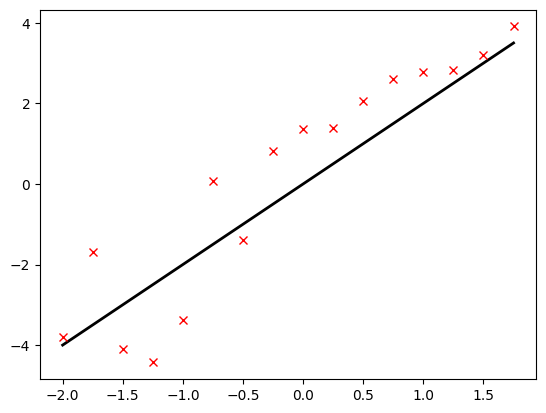

In [2]:
# Datos sinteticos con pendiente
x = 2
a = np.arange(-2,2,0.25)
a = a.reshape(-1, 1)
b = x*a + np.random.randn(*a.shape) # Agregamos ruido Gaussiano

# Graficamos
fig, ax = plt.subplots(1,1)
ax.plot(a, x*a, color='k', linewidth=2, label='linea exacta')
ax.plot(a, b, 'x', color='r', markersize = 6, label='Datos con ruido') 
fig.savefig('regresion1d_1.png')
plt.show()

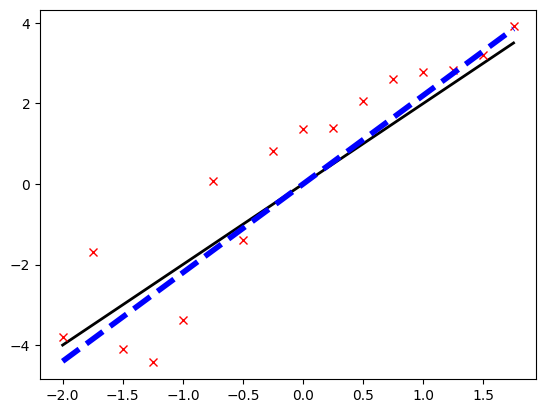

In [3]:
# Calculamos la aproximacion con la pseudo inversa por medio de la SVD
U, S, VT = np.linalg.svd(a,full_matrices=False) # SVD reducida
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # solucion de minimos cuadrados
xtilde2 = np.linalg.pinv(a) @ b
fig, ax = plt.subplots(1,1)
ax.plot(a, x*a, color='k', linewidth=2, label='linea exacta')
ax.plot(a, b, 'x', color='r', markersize = 6, label='Datos con ruido') 
ax.plot(a,xtilde2 * a,'--',color='b',linewidth=4, label=' Regression line')
fig.savefig('regresion1d_2.png')
plt.show()


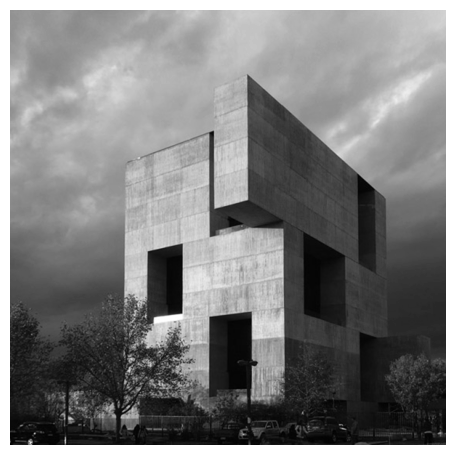

In [21]:
img = Image.open('edif_elemental.png')
imggray = img.convert('LA')
# convert to matrix
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(5,5))
plt.imshow(imgmat, cmap='gray')
plt.tight_layout()
plt.axis('off')
# plt.savefig('fig2svdall.png')
plt.show()

In [22]:
U, sigma, V = np.linalg.svd(imgmat)

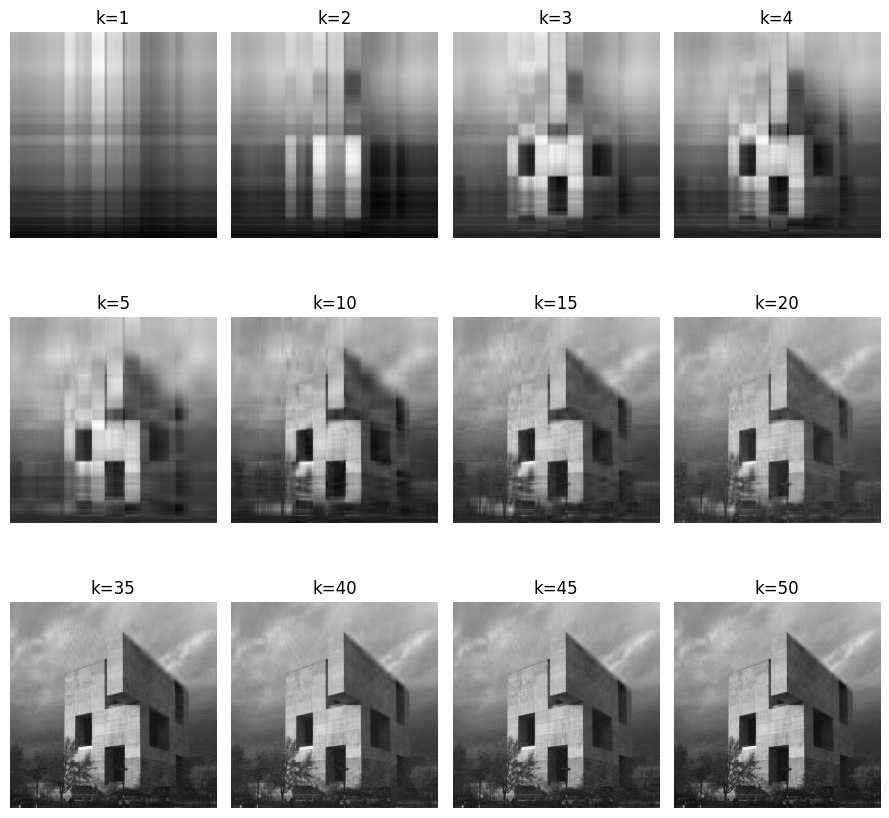

In [23]:
ks = [1,2,3,4,5,10,15,20,35,40,45,50]
fig, axs =plt.subplots(3,4, figsize=(9,9))
for i,ax in enumerate(fig.axes):
    reconstimg = np.matrix(U[:, :ks[i]]) * np.diag(sigma[:ks[i]]) * np.matrix(V[:ks[i], :])
    ax.imshow(reconstimg, cmap='gray')
    ax.set_title(f'k={ks[i]}')
    ax.axis('off')
                                                        
plt.tight_layout()
# plt.savefig('fig2svdAks.png')
plt.show()

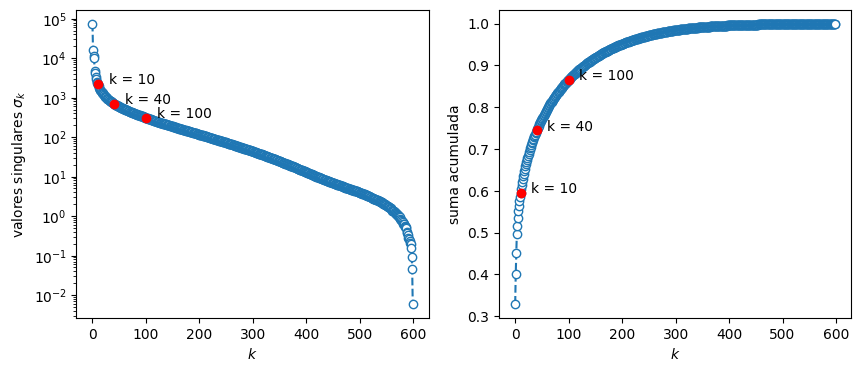

In [59]:
# Plot singular values and cumulative sum
fig, ax = plt.subplots(1,2, figsize=(10,4))
S = np.diag(sigma)
ax[0].semilogy(np.diag(S),'--', marker = 'o', ms = 6, mfc = 'w')
ax[0].semilogy(10,sigma[10], marker = 'o', color='r', ms = 6)
ax[0].text(30,sigma[10],'k = 10')
ax[0].semilogy(40,sigma[40], marker = 'o', color='r', ms = 6)
ax[0].text(60,sigma[40],'k = 40')
ax[0].semilogy(100,sigma[100], marker = 'o', color='r', ms = 6)
ax[0].text(120,sigma[100],'k = 100')
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'valores singulares $\sigma_{k}$')
suma = np.cumsum(np.diag(S))/np.sum(np.diag(S))
ax[1].plot(suma, '--', marker = 'o', ms = 6, mfc = 'w')
ax[1].plot(10,suma[10], marker = 'o', color='r', ms = 6)
ax[1].text(30,suma[10],'k = 10')
ax[1].plot(40,suma[40], marker = 'o', color='r', ms = 6)
ax[1].text(60,suma[40],'k = 40')
ax[1].plot(100,suma[100], marker = 'o', color='r', ms = 6)
ax[1].text(120,suma[100],'k = 100')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylabel('suma acumulada')
fig.savefig('svd_compresion_stats.png')
plt.show()


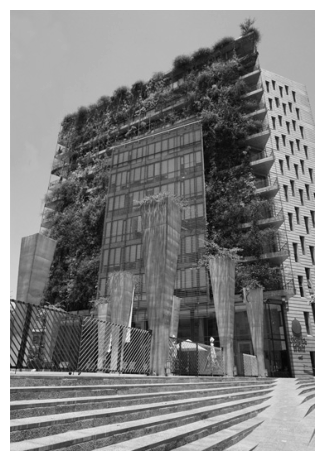

(534, 368)


In [61]:
# Matriz de correlaci\'on
img = Image.open('PATIO-ALAMEDA-UC.JPEG')
imggray = img.convert('LA')
# convert to matrix
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(5,5))
plt.imshow(imgmat, cmap='gray')
plt.tight_layout()
plt.axis('off')
# plt.savefig('fig2svdall.png')
plt.show()
print(imgmat.shape)

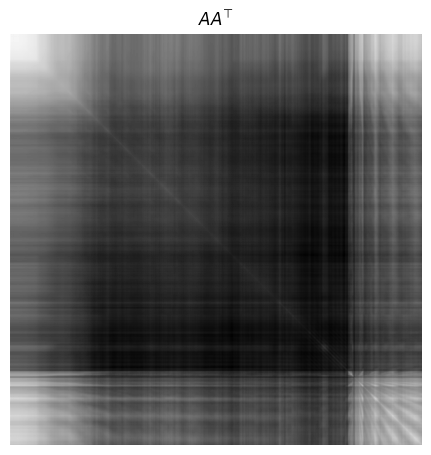

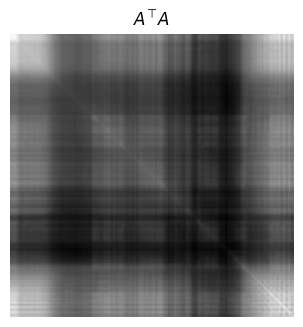

In [73]:
AAT = imgmat@imgmat.T
ATA = imgmat.T@imgmat

fig, ax = plt.subplots(1,1, figsize=(5.34, 5.34))
ax.imshow(AAT , cmap='gray')
ax.set_title(r'$A A^\top$')
ax.axis('off')
ax.set_aspect('equal')
fig.savefig('AAT.png')
plt.show()
fig, ax = plt.subplots(1,1, figsize=(3.68,3.68))
ax.imshow(ATA , cmap='gray')
ax.set_title(r'$ A^\top A $')
ax.axis('off')
ax.set_aspect('equal')
fig.savefig('ATA.png')
plt.show()

## Ejemplo: Regresion multivariada

[[ 7. 26.  6. 60.]
 [ 1. 29. 15. 52.]
 [11. 56.  8. 20.]
 [11. 31.  8. 47.]
 [ 7. 52.  6. 33.]
 [11. 55.  9. 22.]
 [ 3. 71. 17.  6.]
 [ 1. 31. 22. 44.]
 [ 2. 54. 18. 22.]
 [21. 47.  4. 26.]
 [ 1. 40. 23. 34.]
 [11. 66.  9. 12.]
 [10. 68.  8. 12.]]
[ 78.5  74.3 104.3  87.6  95.9 109.2 102.7  72.5  93.1 115.9  83.8 113.3
 109.4]


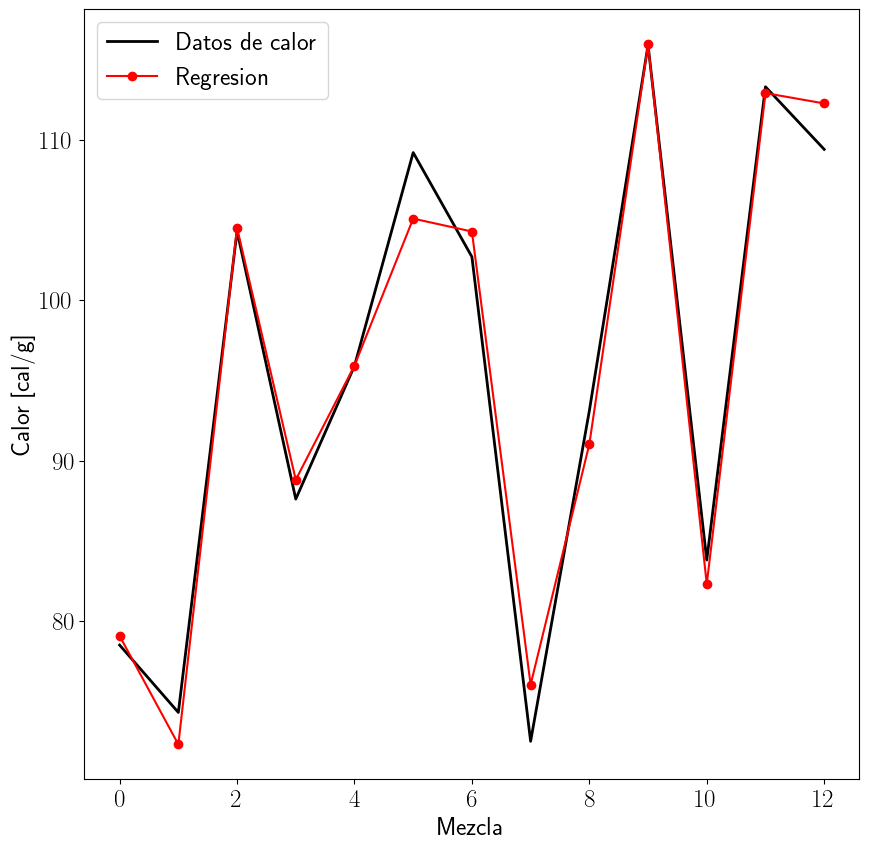

In [76]:
A = np.loadtxt('hald_ingredients.csv',delimiter=',')
b = np.loadtxt('hald_heat.csv', delimiter=',')           

print(A)
print(b)
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
fig,ax = plt.subplots(1,1)
ax.plot(b, color='k', linewidth=2, label='Datos de calor') 
ax.plot(A@x, '-o', color='r', label='Regresion')
ax.set_ylabel('Calor [cal/g]')
ax.set_xlabel('Mezcla')
ax.legend()
fig.savefig('cemento_calor.png')
plt.show()

## Ejemplo: datos de venta de casas


<ipython-input-88-9873db217412>:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.plot(A@x, '-o', Color='r', linewidth=1.5, markersize=6, label='Regresion')


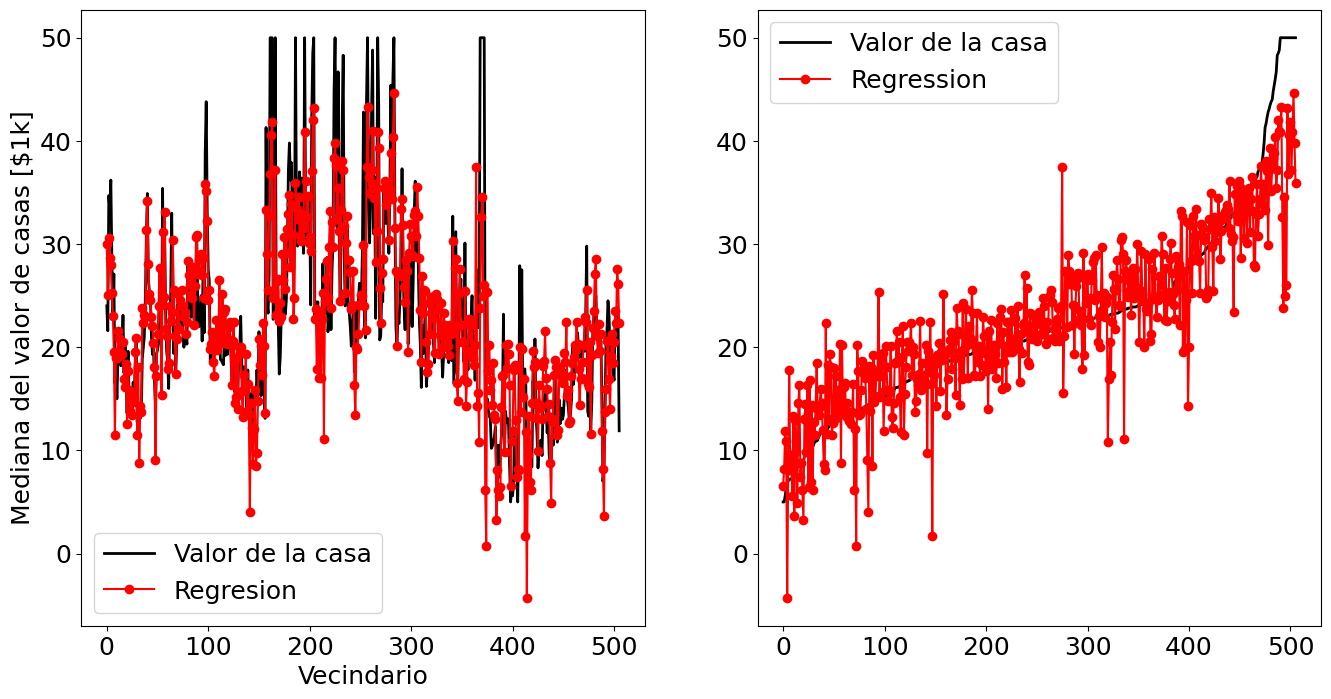

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# Load dataset
H = np.loadtxt('housing.data')
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)


# SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)

ax1.plot(b, color='k', linewidth=2, label='Valor de la casa') 
ax1.plot(A@x, '-o', Color='r', linewidth=1.5, markersize=6, label='Regresion')
ax1.set_xlabel('Vecindario')
ax1.set_ylabel('Mediana del valor de casas [$1k]')
ax1.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
b = b[sort_ind] # sorted values
ax2.plot(b, color='k', linewidth=2, label='Valor de la casa') 
ax2.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
ax1.set_xlabel('Vecindario')
ax2.legend()

fig.savefig('housingval.png')
plt.show()

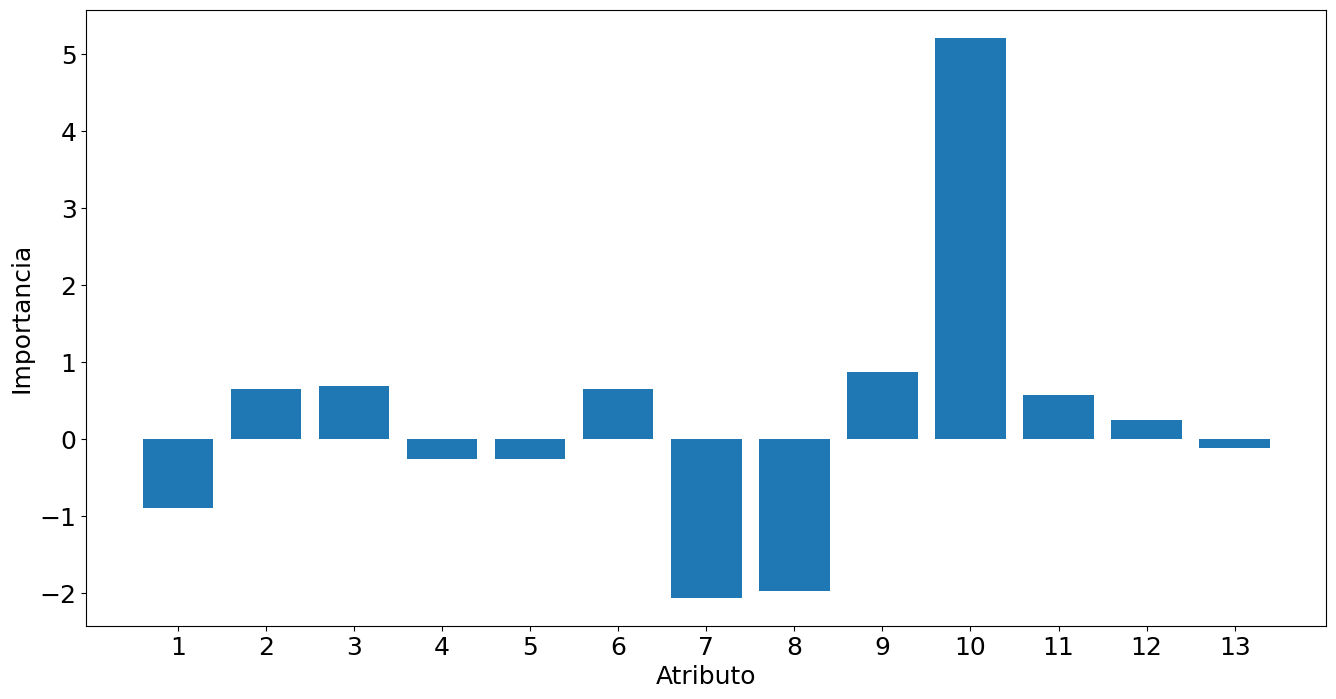

In [93]:
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std
    
A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x_tick,x[:-1])
ax.set_xlabel('Atributo')
ax.set_ylabel('Importancia')
plt.xticks(x_tick)
fig.savefig('housingsignificance.png')
plt.show()


## Ejemplo: Analisis de componentes principales 1

En este primer ejemplo creamos datos artificiales provenientes de una Gaussiana en dimension 2.



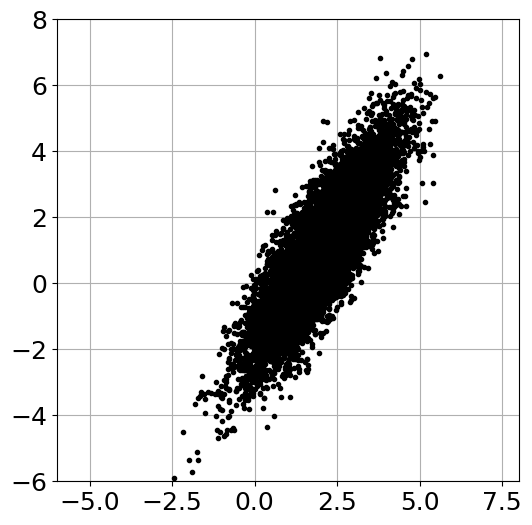

In [111]:
plt.rcParams['figure.figsize'] = [6,6]

xC = np.array([2.0,1.0]) # Este es el centro de nuestros datos o el promedio
sig = np.array([2.0,0.5]) # ejes principales



# Rotacion en angulo theta
theta = np.pi/3.0
c = np.cos(theta); s = np.sin(theta)
R = np.array([[c,-s],[s,c]])

nPoints = 10000

X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))
# stretch los puntos, los rotamos en el angulo theta y los centramos en xC

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(X[0,:], X[1,:], '.', color = 'k')
ax1.grid()
# ax1.axis('off')
ax1.set_xlim((-6,8))
ax1.set_ylim((-6,8))
ax1.set_aspect('equal')
fig.savefig('datapca1.png')
plt.show()

S: [1.9820579  0.49922381] varianza en cada una de las direcciones
u1: [-0.50109041 -0.86539494]
u2: [-0.86539494  0.50109041]


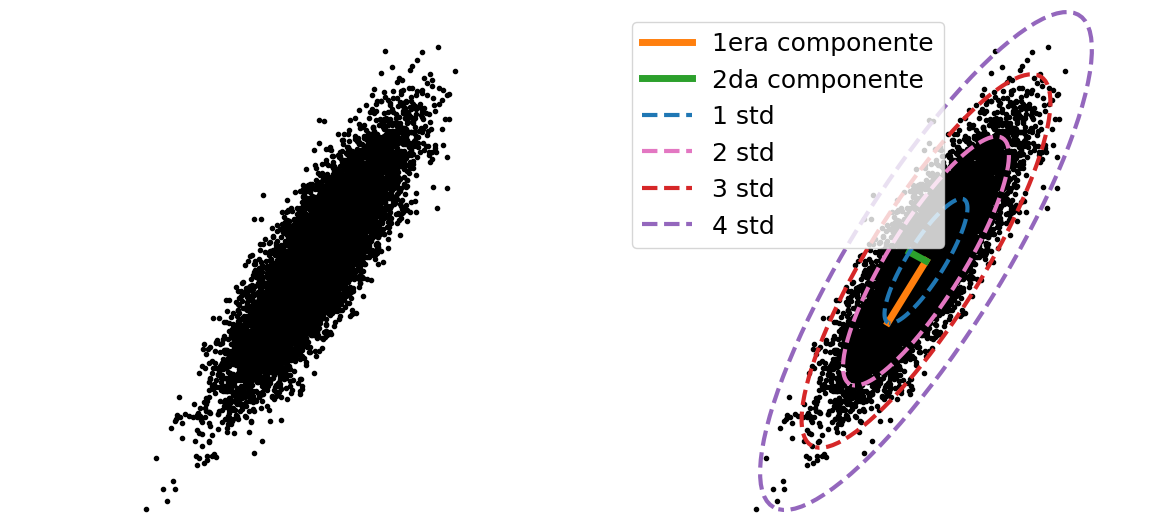

In [112]:
plt.rcParams['figure.figsize'] = [12,6]
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:], X[1,:], '.', color = 'k')
ax1.grid()
ax1.axis('off')
plt.xlim((-6,8))
plt.ylim((-6,8))

Xavg = np.mean(X, axis=1)

B = X - np.tile(Xavg,(nPoints,1)).T

U, S, VT = np.linalg.svd((1.0/np.sqrt(nPoints))*B, full_matrices = 0)
print('S:', S, 'varianza en cada una de las direcciones')
print('u1:', U[:,0])
print('u2:', U[:,1])

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

phi = 2 * np.pi * np.arange(0,1,0.01)

# Intervalos de confianza
# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(phi),np.sin(phi)])

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='C01',linewidth=5, label='1era componente')
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='C02',linewidth=5, label='2da componente')

ax2.plot(Xavg[0] + 1*Xstd[0,:], Xavg[1] + 1*Xstd[1,:],'--',color='C0',  linewidth=3, label='1 std')
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'--',color='C06',linewidth=3, label='2 std')
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'--',color='C03',linewidth=3, label='3 std')
ax2.plot(Xavg[0] + 4*Xstd[0,:], Xavg[1] + 4*Xstd[1,:],'--',color='C04',linewidth=3, label='4 std')
ax2.legend()
plt.tight_layout()
ax2.axis('off')
plt.savefig('pcageo.png')
plt.show()

In [95]:
from sklearn.decomposition import PCA

In [104]:
pca = PCA(n_components=2)
pca.fit((1.0/np.sqrt(nPoints))*B.T)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.94218967 0.05781033]
[2.01461064 0.49902771]


## Ejemplo: Analisis de componentes principales 2

 
###  Base de datos de cancer de ovarios - Eigen-genetic sequences

Visualizacion de datos en alta dimension en baja dimension y clasificacion de datos

(m,n): (216, 4000)


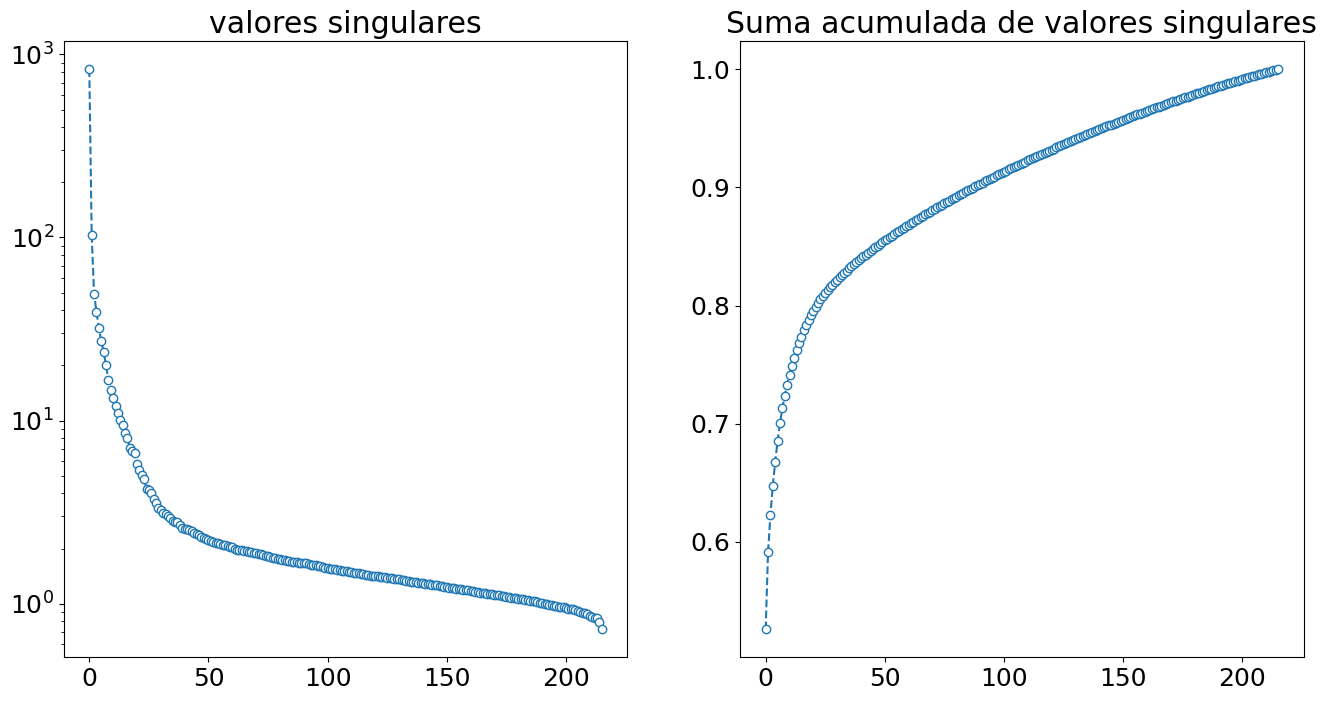

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# load dataset:  216 pacientes, 4000 marcadores geneticos
obs = np.loadtxt('ovariancancer_obs.csv',delimiter=',')
f = open('ovariancancer_grp.csv', "r")
grp = f.read().split("\n")
print("(m,n):", obs.shape)
# la primera mitad de los pacientes tiene cancer de ovarios y la segunda no
# queremos obtener factores key que diferencian los pacientes

# Calcular la SVD
U, S, VT = np.linalg.svd(obs,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'--', marker = 'o', ms = 6, mfc = 'w')
plt.title('valores singulares')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'--', marker = 'o', ms = 6, mfc = 'w')
plt.title('Suma acumulada de valores singulares')
plt.savefig('pcacancer.png')
plt.show()

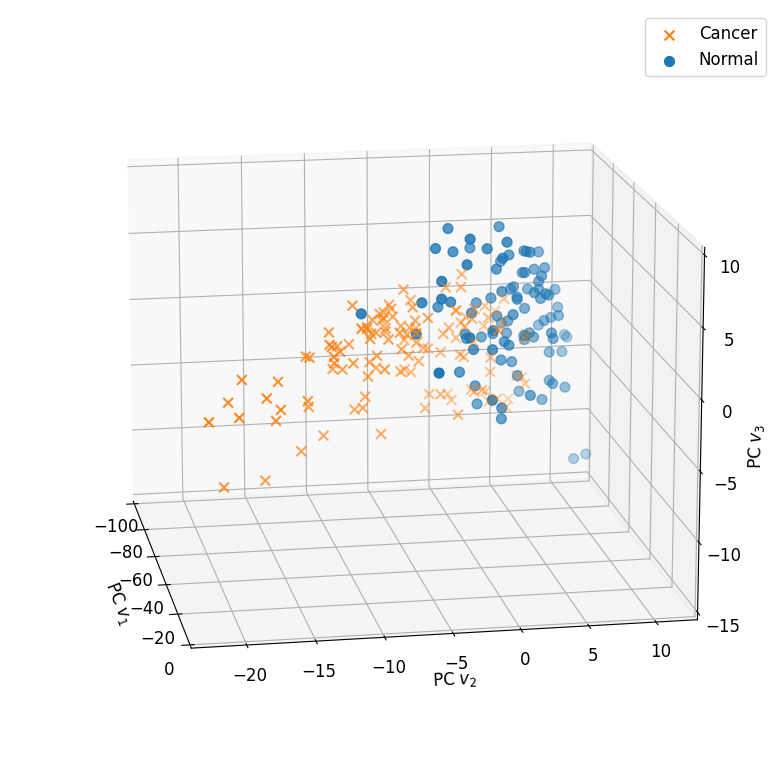

In [153]:
# proyectamos en las componetes principales PC1, PC2, PC3 y visualizamos
#%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 12})
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

PC1 = 0
PC2 = 1
PC3 = 2
cancerid = []
normalid = []
for j in range(obs.shape[0]):
    if grp[j] == 'Cancer':
        cancerid.append(j)   
    else:
        normalid.append(j)
        
x = VT[PC1,:] @ obs.T
y = VT[PC2,:] @ obs.T
z = VT[PC3,:] @ obs.T

ax.scatter(x[cancerid],y[cancerid],z[cancerid],marker='x',color='C01',s=50, label='Cancer')
ax.scatter(x[normalid],y[normalid],z[normalid],marker='o',color='C00',s=50, label='Normal')
           
ax.set_xlabel(r'PC $v_1$')
ax.set_ylabel(r'PC $v_2$')
ax.set_zlabel(r'PC $v_3$')
ax.legend(['Cancer', 'Normal'])
ax.set_xlim(-100,0)
ax.set_zlim(-15,10)
ax.view_init(15,350)
fig2.tight_layout()
fig2.savefig('pcacancermarkers.png')
plt.show()

## Ejemplo: Analisis de componentes principales 3

### Eigenfaces
    

Dimension de cada imagen: m,n : 168 192
Numero de imegenes por persona/numero de caras:  [64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64]


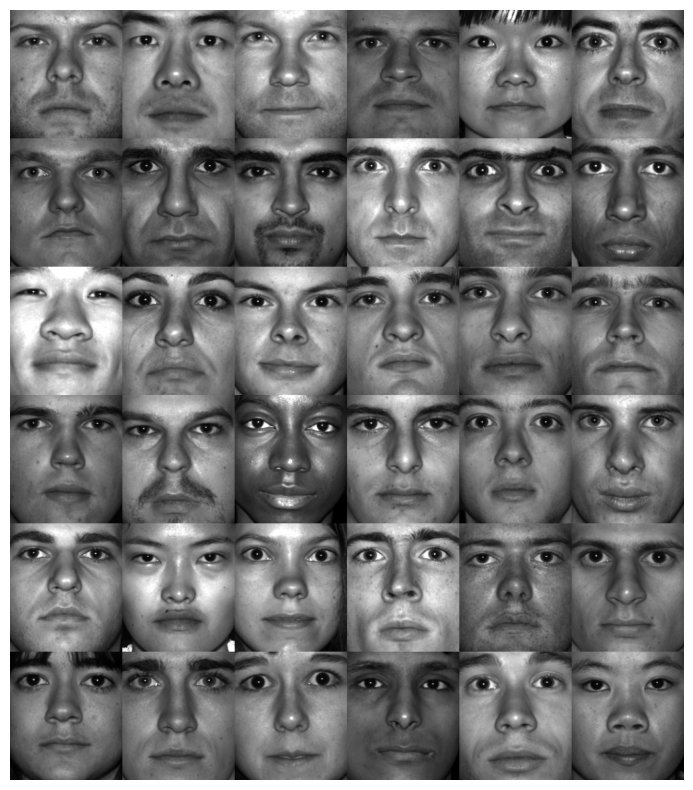

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat('allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
print("Dimension de cada imagen: m,n :", m,n)
nfaces = np.ndarray.flatten(mat_contents['nfaces'])
print("Numero de imegenes por persona/numero de caras: ", nfaces)
allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [ ]:
# Muestra todas el conjunto de todas las imagenes
print("Todas las imagenes separadas por persona")
for person in range(len(nfaces)):
    subset = faces[:,sum(nfaces[:person]) : sum(nfaces[:(person+1)])]
    allFaces = np.zeros((n*8,m*8))
    count = 0
    for j in range(8):
        for k in range(8):
            if count < nfaces[person]:
                allFaces[j*n:(j+1)*n,k*m:(k+1)*m] = np.reshape(subset[:,count],(m,n)).T
                count += 1
    img = plt.imshow(allFaces)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

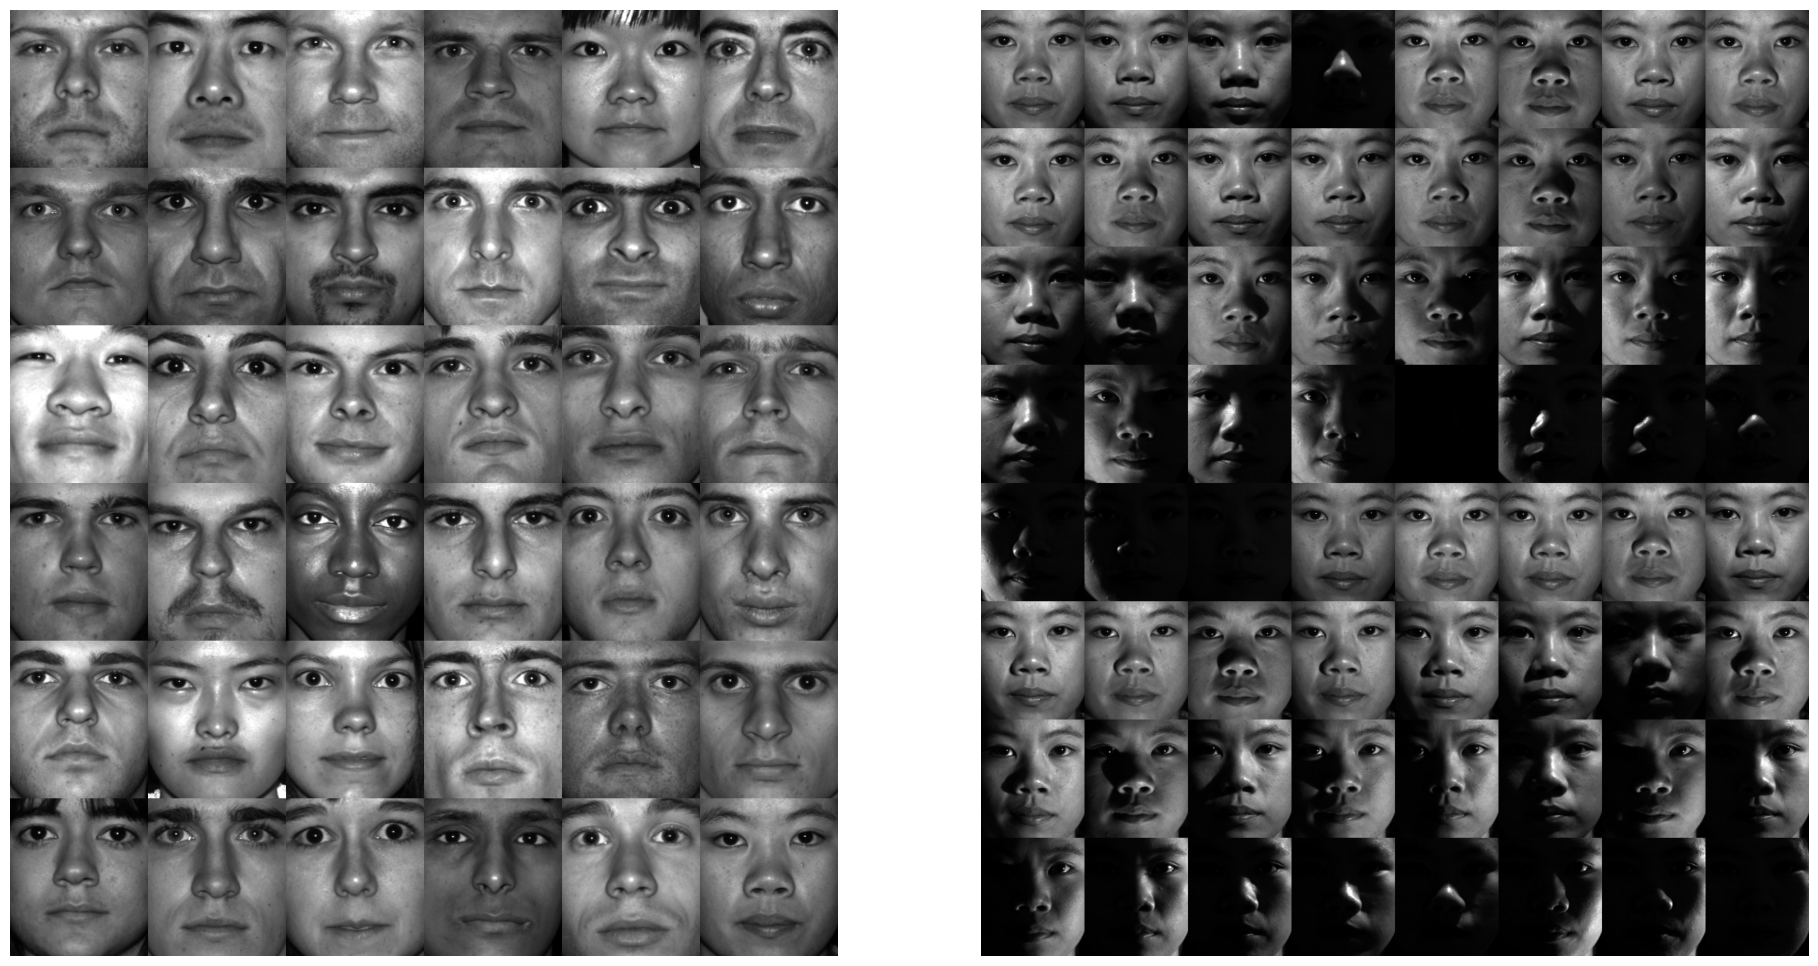

In [11]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 18})

fig,ax = plt.subplots(1,2)
allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = ax[0].imshow(allPersons)
img.set_cmap('gray')
ax[0].axis('off')

personid =35 
subset = faces[:,sum(nfaces[:personid]) : sum(nfaces[:(personid+1)])]
person1 = np.zeros((n*8,m*8))
count = 0
for j in range(8):
    for k in range(8):
        if count < nfaces[personid]:
            person1[j*n:(j+1)*n,k*m:(k+1)*m] = np.reshape(subset[:,count],(m,n)).T
            count += 1
img2 = ax[1].imshow(person1)
img2.set_cmap('gray')
ax[1].axis('off')
fig.tight_layout()
fig.savefig('eigenfaces.png')
plt.show()

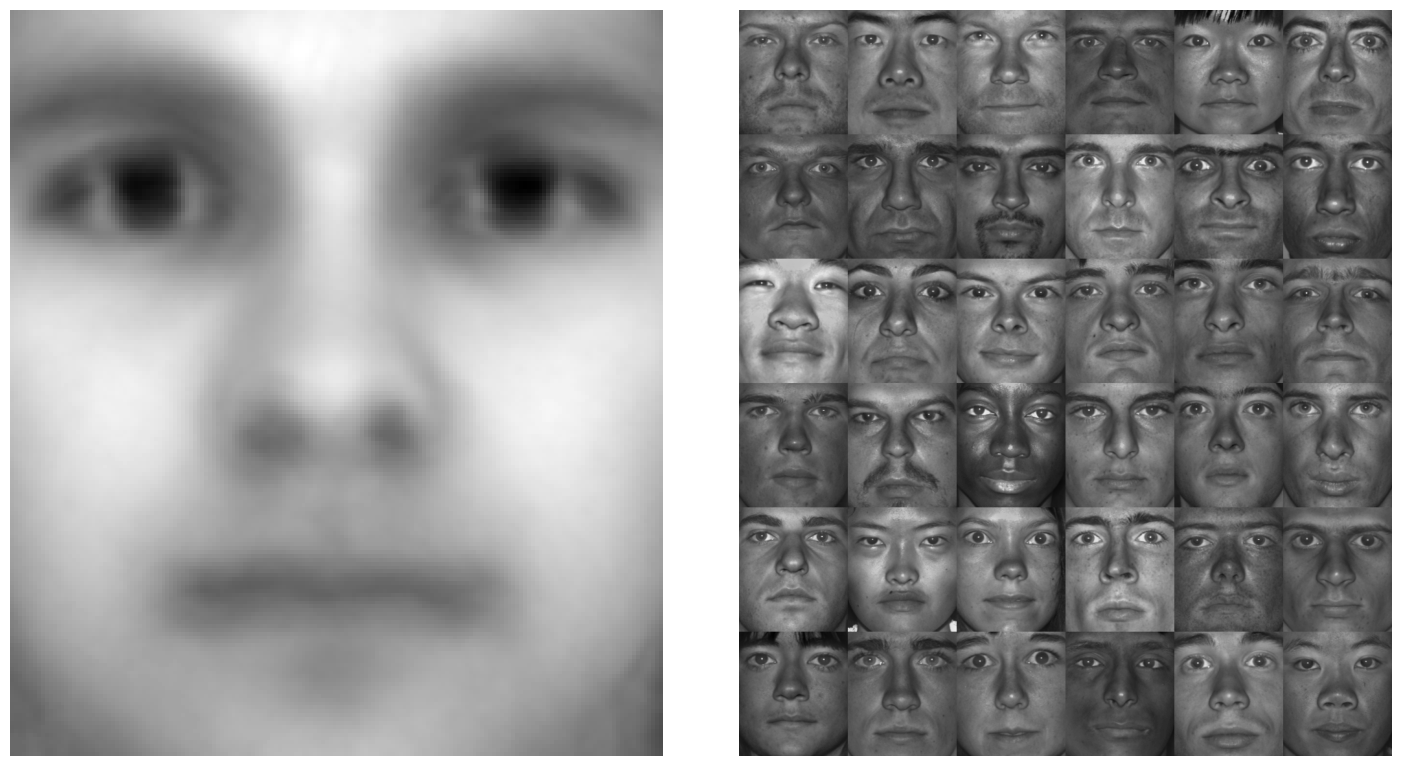

In [15]:
plt.rcParams['figure.figsize'] = [16, 8]

# Usamos para entrenar las imagenes asociadas a las primeras 36 personas
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1

fig, ax = plt.subplots(1,2)
img = ax[0].imshow(np.reshape(avgFace,(m,n)).T)
img.set_cmap('gray')
ax[0].axis('off')
fig.tight_layout()

allPersons = np.zeros((n*6,m*6))
count = 0
for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(X[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img2 = ax[1].imshow(allPersons)
img2.set_cmap('gray')
ax[1].axis('off')
fig.tight_layout()
fig.savefig('meanfaces.png')

plt.show()

In [13]:
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T # mean centered data base

In [14]:
U, S, VT = np.linalg.svd(X,full_matrices=0)

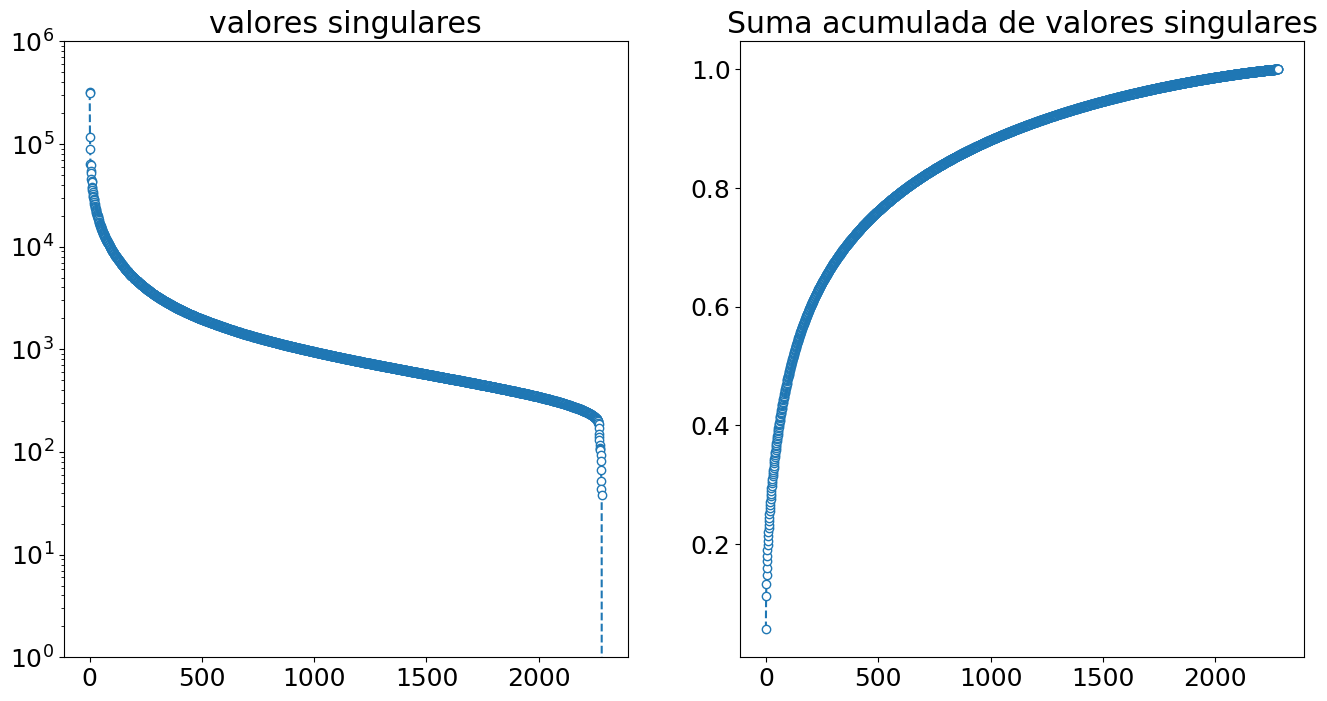

In [16]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'--', marker = 'o', ms = 6, mfc = 'w')
ax1.set_ylim(1,10**6)
plt.title('valores singulares')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'--', marker = 'o', ms = 6, mfc = 'w')
plt.title('Suma acumulada de valores singulares')
plt.savefig('pcaeigenfaces.png')
plt.show()

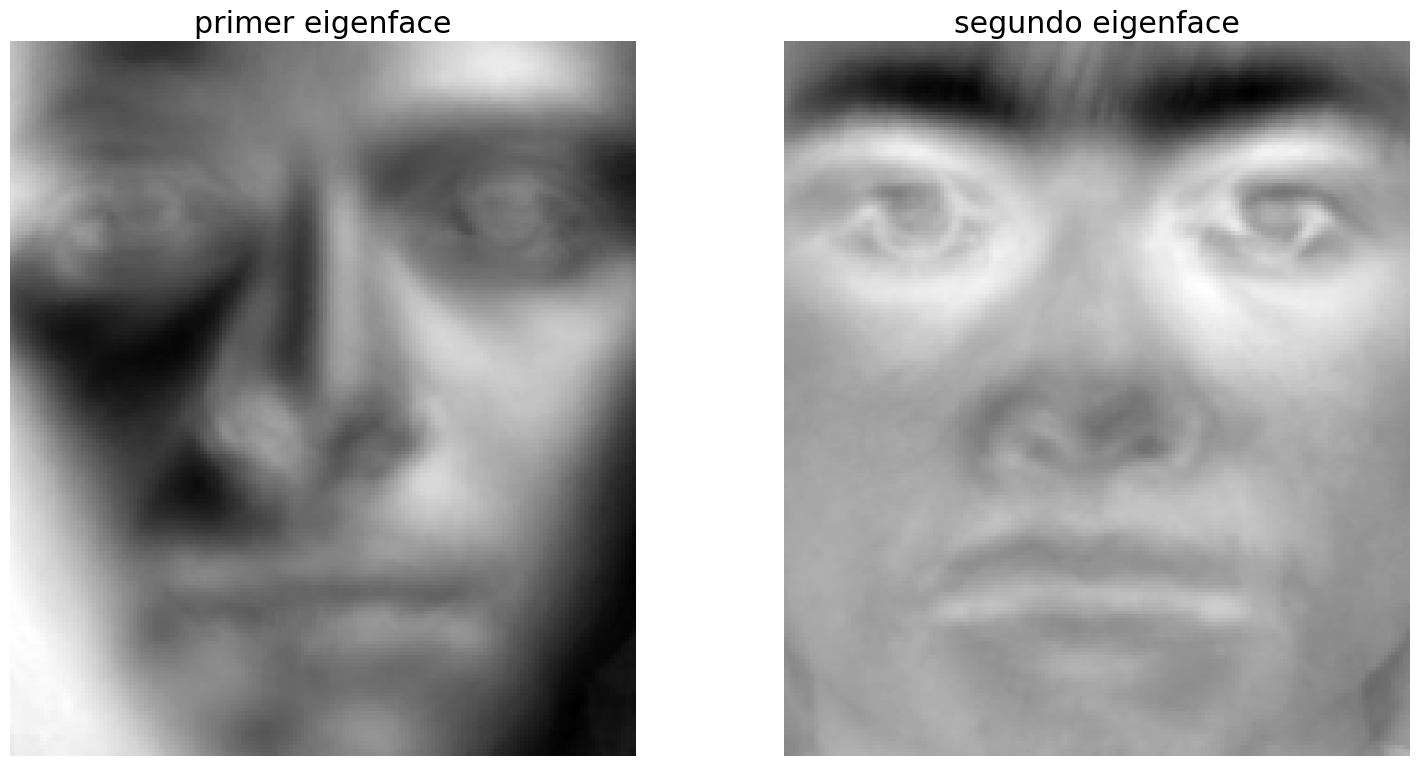

In [19]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_u1 = ax1.imshow(np.reshape(U[:,4],(m,n)).T)
img_u1.set_cmap('gray')
ax1.set_title('primer eigenface')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u2 = ax2.imshow(np.reshape(U[:,5],(m,n)).T)
img_u2.set_cmap('gray')
plt.axis('off')
ax2.set_title('segundo eigenface')
fig1.tight_layout()
fig1.savefig('eigenfaces1y2.png')
plt.show()

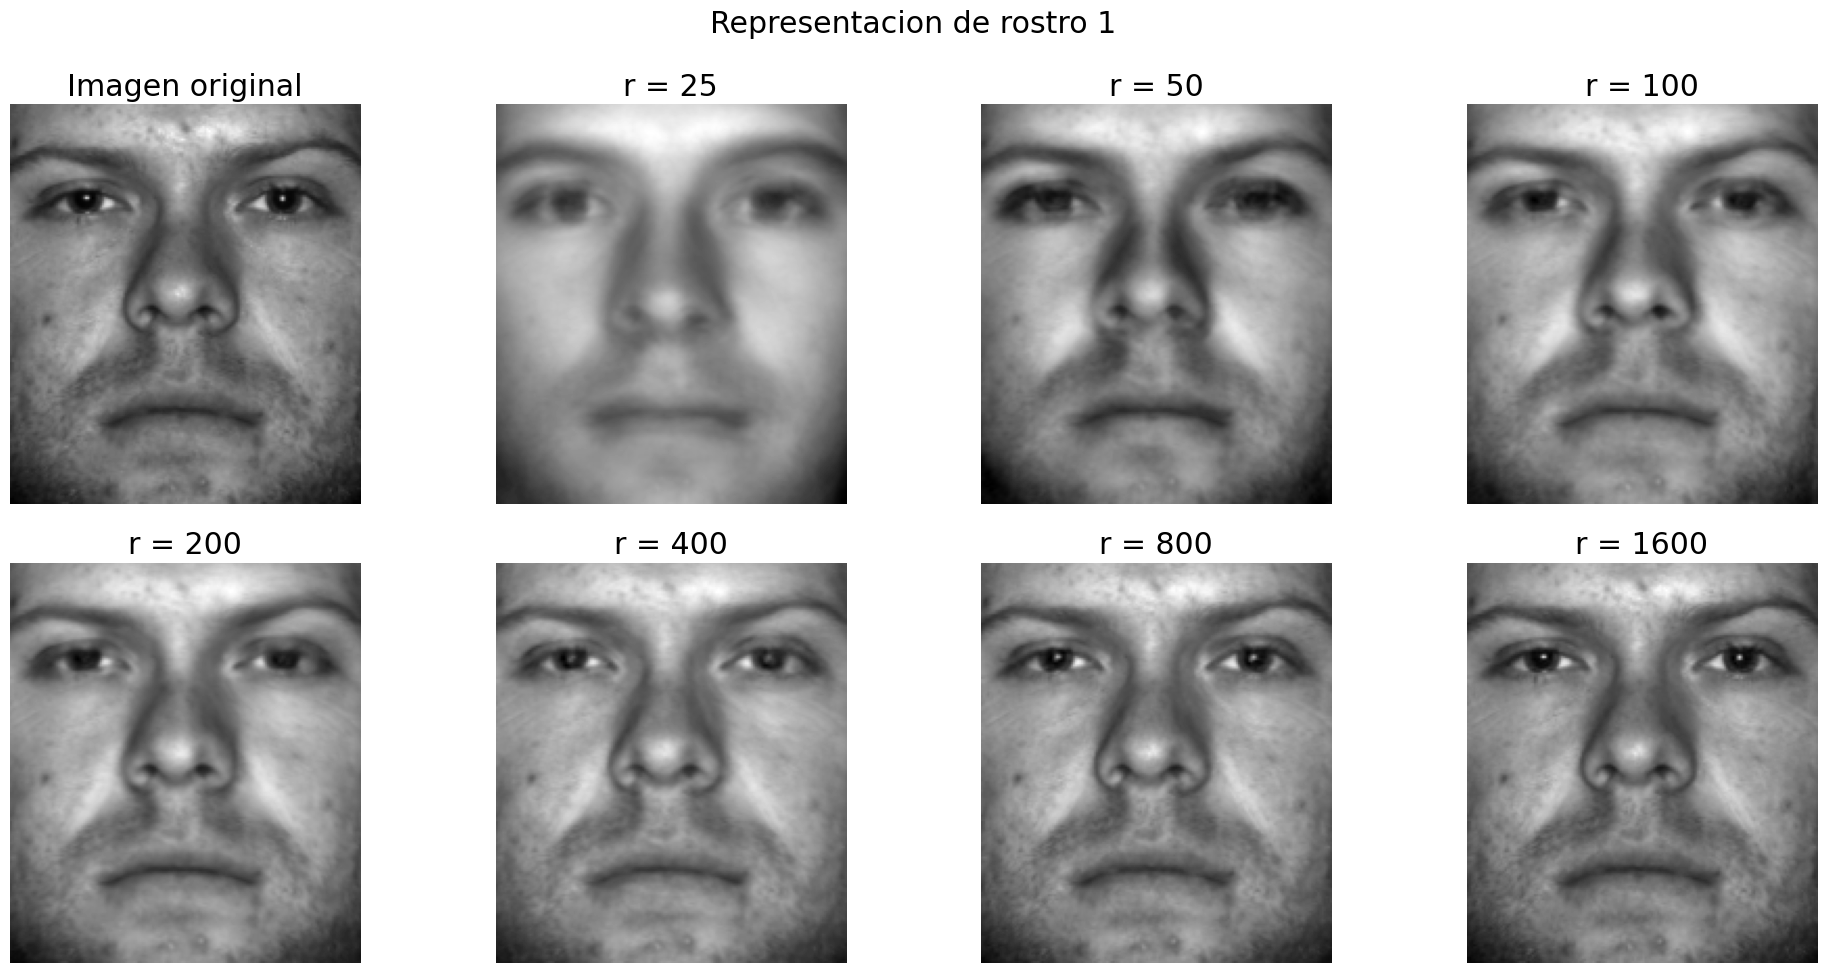

In [20]:
# cara 1
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 18})

# plt.figure(figsize=(15, 12))
# plt.subplots_adjust(hspace=0.1)
plt.suptitle("Representacion de rostro 1")

#ax1 = fig1.add_subplot(241)
cara1 = faces[:,np.sum(nfaces[:0])] # First face of person 1
ax = plt.subplot(2, 4, 1)
img = ax.imshow(np.reshape(cara1,(m,n)).T)
ax.set_title('Imagen original')
img.set_cmap('gray')
ax.axis('off')

# proyectamos en
cara1MS = cara1 - avgFace
r_list = [25, 50, 100, 200, 400, 800, 1600]


for ii, r in enumerate(r_list):
    # Observe que U.T U  = P es una proyeccion!
    reconFace = avgFace + (U[:,:r]).dot((U[:,:r].T).dot(cara1MS))
    ax = plt.subplot(2, 4, ii + 2)
    img = ax.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    
    ax.set_title('r = ' + str(r))
    ax.axis('off')
plt.tight_layout()
plt.savefig('eigenfacereconst1.png')
plt.show()

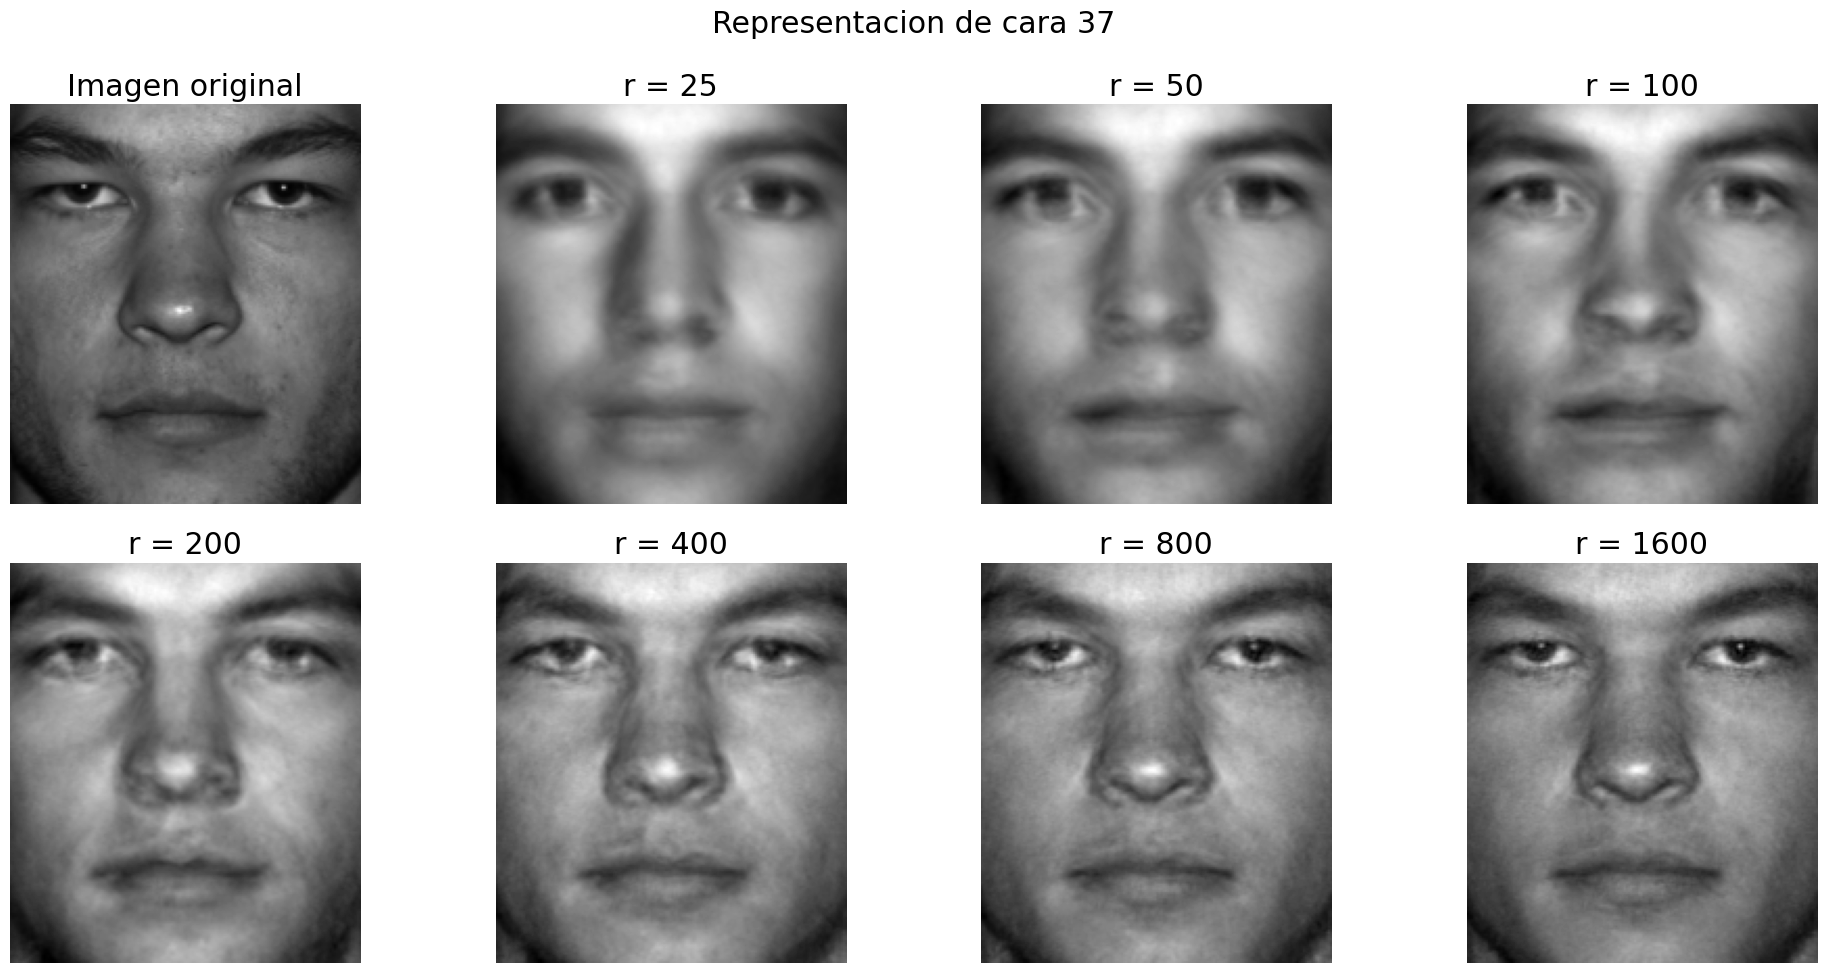

In [21]:
# Ahora proyectamos una cara/rostro nuevo usando los datos de entrenamiento
# cara X
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 18})
plt.figure()
# plt.subplots_adjust(hspace=0.1)
plt.suptitle("Representacion de cara 37")
testFace = faces[:,np.sum(nfaces[:36])] # First face of person 37
ax = plt.subplot(2, 4, 1)
img = ax.imshow(np.reshape(testFace,(m,n)).T)
img.set_cmap('gray')
ax.set_title('Imagen original')
ax.axis('off')


testFaceMS = testFace - avgFace
r_list = [25, 50, 100, 200, 400, 800, 1600]

for ii, r in enumerate(r_list):
    reconFace = avgFace + (U[:,:r]).dot((U[:,:r].T).dot(testFaceMS))
    ax = plt.subplot(2, 4, ii + 2)
    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    ax.set_title('r = ' + str(r))
    ax.axis('off')
plt.tight_layout()
plt.savefig('eigenfacereconst37.png')
plt.show()

[64 62 64]


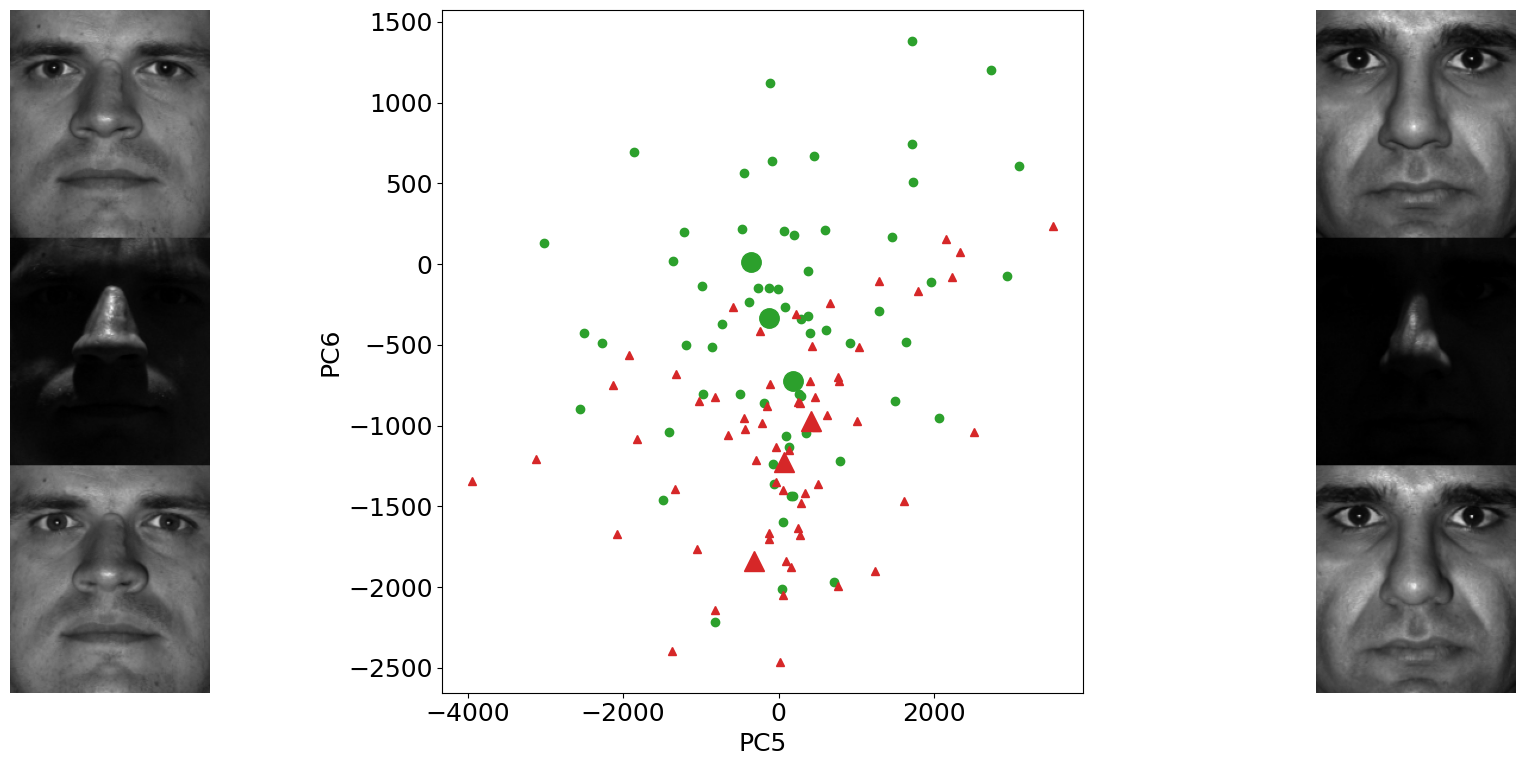

In [24]:
## Project person 2 and 7 onto PC5 and PC6
plt.rcParams['figure.figsize'] = [20, 8]
P1num = 3 # Person number 2
P2num = 7 # Person number 7

P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

fig, ax = plt.subplots(1,3)
ax[1].plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'o',color='C02',label='Person 2')
ax[1].plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',color='C03',label='Person 7')

ax[1].set_xlabel('PC5')
ax[1].set_ylabel('PC6')

# ax[1].axis('off')
print(nfaces[:P1num])
subset1 = faces[:,sum(nfaces[:P1num]) : sum(nfaces[:(P1num+1)])]
person1 = np.zeros((n*3,m))
mark = [ 0,3,7]
ax[1].plot(PCACoordsP1[0,mark],PCACoordsP1[1,mark],'o',color='C02',ms='14')
ax[1].plot(PCACoordsP2[0,mark],PCACoordsP2[1,mark],'^',color='C03',ms='14')
# print(posp1)
subset2 = faces[:,sum(nfaces[:P2num]) : sum(nfaces[:(P2num+1)])]
person2 = np.zeros((n*3,m))


for j, jf in enumerate(mark):
    if count < nfaces[P1num]:
        person1[j*n:(j+1)*n,:m] = np.reshape(subset1[:,jf],(m,n)).T
        person2[j*n:(j+1)*n,:m] = np.reshape(subset2[:,jf],(m,n)).T

img1 = ax[0].imshow(person1)
img1.set_cmap('gray')
ax[0].axis('off')

img2 = ax[2].imshow(person2)
img2.set_cmap('gray')
ax[2].axis('off')
fig.tight_layout()

fig.savefig('eigenfaces_markers.png')
plt.show()


In [246]:
A = np.array([[0.75,0],[1.,1.25]])
# A = 4.*np.array([[3./4.,0],[1.,5./4.]])
# A = np.array([[3.,0],[4.,5.]])
U, sigma, VT = np.linalg.svd(A)
print(U)
print(sigma, np.sqrt(45.0)/4.)
print(VT)

[[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]
[1.67705098 0.55901699] 1.6770509831248424
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


***

# Minimos cuadrados 


In [32]:
def LS_normaleqns(A,b):
    ATA = A.T@A
    ATb = A.T.dot(b)

    L = np.linalg.cholesky(ATA) # A.T@A = R@R.T
    w = sp.linalg.solve_triangular(L, ATb, lower=True)
    x = sp.linalg.solve_triangular(L.T, w)
    r = np.linalg.norm(A.dot(x)-b)
    return x, r

def LS_viaQR(A,b):
    Q,R = np.linalg.qr(A)
    x = sp.linalg.solve_triangular(R, Q.T.dot(b))
    r = np.linalg.norm(A.dot(x)-b)
    return x, r

def LS_viaSVD(A,b):
    U,S,V = np.linalg.svd(A, full_matrices=True) # A = U@S@V
    UTb = U.T.dot(b)
    w = np.zeros(len(S), dtype=np.float64)
    for j in range(len(S)):
        w[j] = UTb[j]/S[j]
    x = V.T.dot(w)
    r = np.linalg.norm(A.dot(x)-b)
    return x, r

def LS_viaLinearsystem(A,b):
    m,n = A.shape
    B = np.zeros((m+n, m+n), dtype=np.float64)
    B[n:(m+n),:n] = A.copy()
    B[:n,n:(m+n)] = A.T.copy()
    B[n:(m+n), n:(m+n)] = np.eye(m)
    bb = np.zeros(n+m,dtype=np.float64)
    bb[n:(m+n)] = b.copy()
    xy = np.linalg.solve(B,bb)
    x = xy[:n]
    r = np.linalg.norm(A.dot(x)-b)
    return x, r

## Ejemplo: minimos cuadrados
\begin{equation}
\mathrm{minimizar}\{ \|Ax -b\|, x\in \mathbb R^{3} \},\qquad\mbox{con }
A = 
\begin{pmatrix}
2&0\\
-1&1\\
0&2
\end{pmatrix},\qquad
b = 
\begin{pmatrix}
1\\0\\-1
\end{pmatrix}
\end{equation}

In [33]:
A = np.array([[2,0],[-1,1],[0,2]], dtype=np.float64)
b = np.array([1,0,-1], dtype=np.float64)

x1,r1 = LS_normaleqns(A,b)
print(x1,r1**2)

x2,r2 = LS_viaQR(A,b)
print(x2,r2**2)

x3,r3 = LS_viaSVD(A,b)
print(x3,r3**2)

x4,r4 = LS_viaLinearsystem(A,b)
print(x4,r4**2)

[ 0.33333333 -0.33333333] 0.6666666666666666
[ 0.33333333 -0.33333333] 0.6666666666666666
[ 0.33333333 -0.33333333] 0.6666666666666666
[ 0.33333333 -0.33333333] 0.6666666666666666


## Ejemplo: Ajuste polinomial

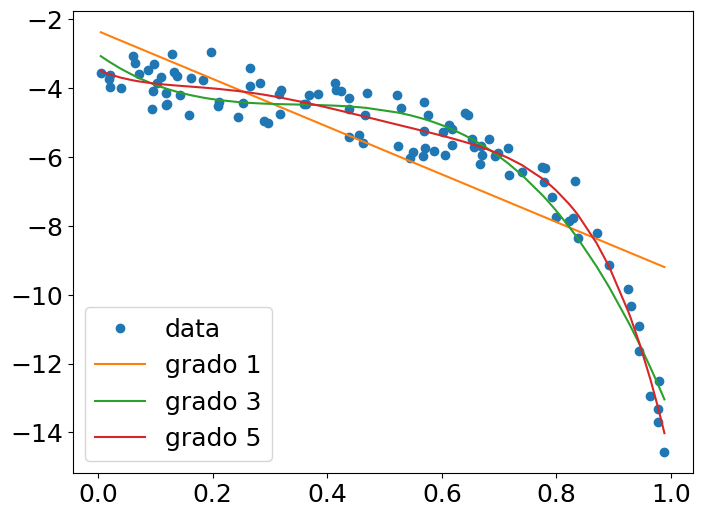

In [34]:
from numpy import vander
x = np.random.random_sample(100)
noise = np.random.normal(0, .5, x.shape)
c = 10*np.random.rand(15)-5

y = np.polyval(c,x) + noise
# Plot data
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,y,'o', label='data')


# poly grado 1
A = vander(x, N=2)
coeff1 = np.linalg.solve(A.T@A, (A.T).dot(y))
# poly grado 3
A = vander(x, N=4)
coeff3 = np.linalg.solve(A.T@A, (A.T).dot(y))
# poly grado 5
A = vander(x, N=6)
coeff5 = np.linalg.solve(A.T@A, (A.T).dot(y))

# plot polys
yhat1 = np.polyval(coeff1, np.sort(x))
yhat3 = np.polyval(coeff3, np.sort(x))
yhat5 = np.polyval(coeff5, np.sort(x))


ax.plot(np.sort(x),yhat1, label='grado 1')
ax.plot(np.sort(x),yhat3, label='grado 3')
ax.plot(np.sort(x),yhat5, label='grado 5')
ax.legend()

## Ejemplo: lineal a trozos

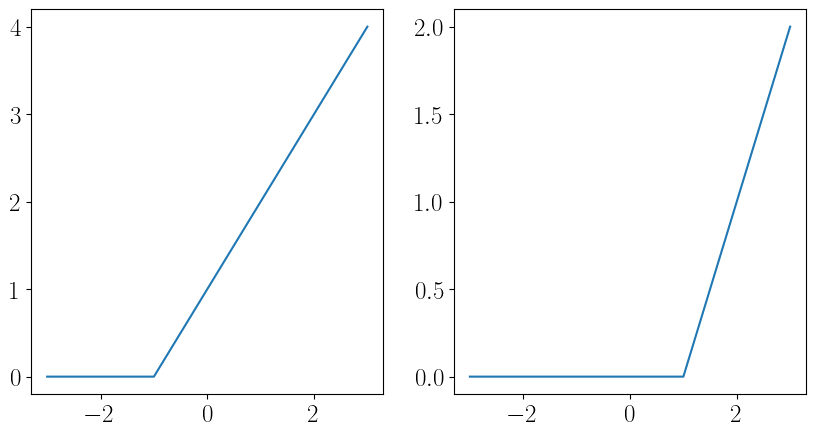

In [87]:
def ReLu(u):
    return max(u,0)

f1 = lambda x: np.array([ReLu(xi+1) for xi in x])
f2 = lambda x: np.array([ReLu(xi-1) for xi in x])
xplot = np.linspace(-3,3,100)
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].plot(xplot,f1(xplot))
ax[1].plot(xplot,f2(xplot))
plt.show()

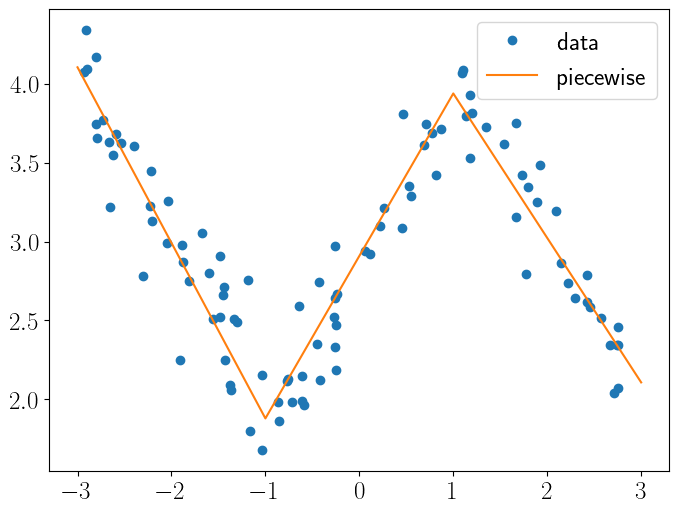

In [88]:
x = np.random.rand(100)*6-3

A = np.vstack(( [np.ones(x.size), x,f1(x),f2(x)] )).T
coeff = np.array([1, -1, 2, -2])
noise = np.random.normal(0, .25, x.shape)
b = A.dot(coeff) + noise

c = np.linalg.solve((A.T@A), (A.T).dot(b))
cfun = lambda x: c[0]*1 + c[1]*x + c[2]*f1(x) + c[3]*f2(x)
# plots
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,b,'o', label='data')
xplot = np.linspace(-3,3,100)
ax.plot(xplot, cfun(xplot), label='piecewise')
ax.legend()
plt.show()


## Ejemplo: Advertising purchases
###  Ejemplo de Boyd Vandenbergue
We have m demographic groups or audiences that we want to advertise to, with a target number of impressions or views for each group, which we give as a vector $v^{des}$. (The entries are positive.) To reach these audiences, we purchase advertising in n different channels (say, different web publishers, radio,
print, . . . ), in amounts that we give as an $n$-vector s. (The entries of s are non-
negative, which we ignore.) The $m \times n$ matrix $R$ gives the number of impressions
in each group per dollar spending in the channels: $R_{ij}$ is the number of impres-
sions in group $i$ per dollar spent on advertising in channel $j$. (These entries are
estimated, and are nonnegative.) The $j$th column of $R$ gives the effectiveness or
reach (in impressions per dollar) for channel $j$. The $i$th row of $R$ shows which
media demographic group $i$ is exposed to. The total number of impressions in each
demographic group is the $m$-vector $v$, which is given by $v = Rs$. The goal is to
find $s$ so that $v = Rs\approx v^{des}$ . We can do this using least squares, by choosing 
$s$ to minimize $\| Rs − v^{des} \|^2$ . (We are not guaranteed that the resulting channel spend vector will be nonnegative.) 

In [36]:
R = np.array([[0.97, 1.86, 0.41 ],
              [1.23, 2.18, 0.53 ],
              [0.80, 1.24, 0.62 ],
              [1.29, 0.98, 0.51 ],
              [1.10, 1.23, 0.69 ],
              [0.67, 0.34, 0.54 ],
              [0.87, 0.26, 0.62 ],
              [1.10, 0.16, 0.48 ],
              [1.92, 0.22, 0.71 ],
              [1.29, 0.12, 0.62]], dtype=np.float64)
b = np.ones(10)*10**3 # v^des

In [37]:
s, residual = LS_viaSVD(R,b)
print(R.dot(s)-b)
print(s)
print(residual)

[-162.25020706   59.02541212   68.20193141  -86.08874449  186.82369111
 -145.28153041  -25.43800882 -223.15613034  165.59841841  -13.36372708]
[  62.07662454   99.98500403 1442.83746254]
419.43878595468675


## Ejemplo: Regression precio de casas

In [38]:
housing = pd.read_csv('Housing.csv.xls')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [39]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
y_train = df_train.pop('price')
X_train = df_train[['area', 'bedrooms']]

### Regresion usando sklearn

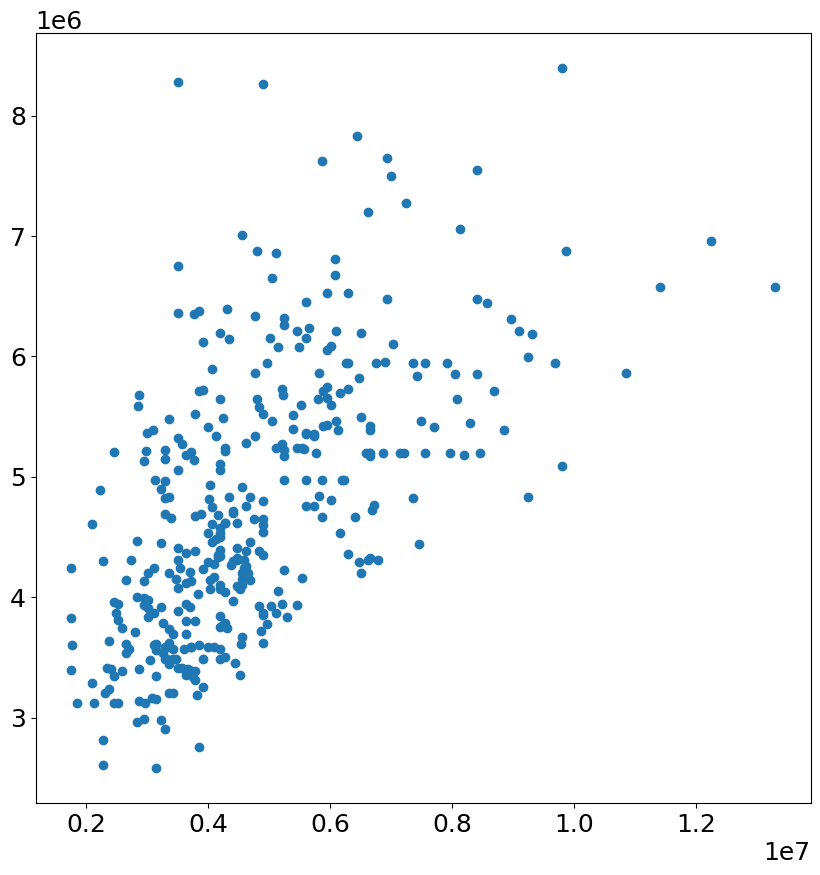

306259.82776021585
[4.43868831e+02 7.43361100e+05]


In [41]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
plt.scatter(y_train, y_pred); plt.show()
print(lm.intercept_)
print(lm.coef_)


### Regresion usando minimos cuadrados via QR

In [ ]:
N,n = X_train.shape
A = np.hstack((np.ones((N,1)), X_train.copy()))
b = y_train.copy()
x, r = LS_viaQR(A,b)
my_y_pred = A.dot(x)
plt.scatter(y_train, my_y_pred); plt.show()

### Cross - validation

In [42]:
from sklearn.model_selection import cross_val_score
y = housing.pop('price')
X = housing[['area', 'bedrooms']]

#clf = svm.SVC(kernel='linear', C=1, random_state=42)
linreg = LinearRegression()
scores = cross_val_score(linreg, X, y, cv=5)
print(scores)

[ -3.98730075  -7.53622047 -15.60946955 -38.36868296 -17.83403845]


In [43]:
house_sales = {'baths': np.array([2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2,
       1, 3, 2, 3, 2, 2, 2, 1, 3, 2, 2, 3, 2, 3, 4, 3, 1, 3, 3, 2, 2, 3,
       2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2,
       2, 1, 3, 1, 2, 2, 2, 2, 2, 3, 4, 2, 2, 3, 4, 2, 1, 2, 1, 3, 4, 3,
       2, 3, 3, 2, 3, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 3, 2, 1, 2, 2, 2, 3, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2,
       1, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2,
       3, 3, 3, 2, 2, 4, 3, 2, 4, 3, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 3,
       2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 3, 2, 1, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       1, 1, 3, 4, 3, 3, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2]), 'location': np.array([2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3,
       2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 4, 2, 2, 3, 3, 2,
       3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 4, 3, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 1, 3, 4, 3, 3, 3, 2, 4, 3, 3, 3, 4, 2, 2,
       1, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3,
       2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3,
       2, 2, 3, 2, 2, 3, 3, 2, 4, 2, 3, 2, 2, 3, 2, 3, 1, 2, 2, 4, 2, 3,
       3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 4, 2, 4, 2, 2, 3, 2, 2, 3, 4, 4,
       3, 3, 2, 1, 4, 3, 4, 3, 1, 3, 3, 4, 4, 3, 3, 2, 1, 4, 2, 3, 2, 2,
       2, 3, 3, 2, 4, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 4, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2,
       2, 3, 4, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 4,
       2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 4, 4, 2, 2, 3, 2,
       2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 1, 4, 4, 2, 3, 3, 3, 2, 3, 3, 2, 3,
       2, 2, 3, 2, 3, 2, 3, 3, 4, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 4, 2, 2, 4, 2, 2, 3, 3, 3, 2, 3, 1, 2, 4, 2, 3, 3, 2, 3, 3,
       2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 1, 4, 3, 1, 2, 1,
       2, 4, 1, 4, 3, 3, 2, 4, 2, 3, 4, 4, 2, 3, 4, 2, 4, 3, 3, 2, 2, 2,
       1, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3,
       3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 4, 3, 2, 4, 3, 3, 3,
       3, 2, 3, 2, 2, 4, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2,
       2, 2, 3, 3, 4, 2, 1, 1, 2, 3, 2, 3, 3, 2, 2, 3, 3, 4, 2, 2, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 4, 2, 2, 4, 2, 3,
       3, 2, 4, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 4, 3, 1, 2, 4, 3, 4, 3,
       2, 2, 4, 4, 3, 4, 2, 4, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 2, 4, 3,
       2, 4, 4, 3, 4, 4, 3, 3, 2, 4, 3, 4, 1, 2, 4, 1, 4, 3, 4, 2, 4, 2,
       2, 1, 4, 3, 4, 4, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3,
       2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 1,
       3, 2, 3, 2, 3, 3, 2, 2, 3, 1, 3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 2, 3,
       3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 1, 2, 3, 2, 4,
       2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 4, 3, 3, 3, 3,
       3, 2, 3, 4]), 'price': np.array([ 94.905,  98.937, 100.309, 106.25 , 107.502, 108.75 , 110.7  ,
       113.263, 116.25 , 120.   , 121.63 , 122.   , 122.682, 123.   ,
       124.1  , 125.   , 126.64 , 127.281, 129.   , 131.2  , 132.   ,
       133.   , 134.555, 136.5  , 138.75 , 141.   , 146.25 , 147.308,
       148.75 , 149.593, 150.   , 152.   , 154.   , 156.896, 161.25 ,
       161.5  , 164.   , 165.   , 166.357, 166.357, 168.   , 170.   ,
       173.   , 174.25 , 174.313, 178.48 , 178.76 , 181.   , 181.872,
       182.587, 182.716, 182.75 , 183.2  , 188.741, 189.   , 192.067,
       194.   , 194.818, 198.   , 199.5  , 200.   , 200.   , 208.   ,
       212.864, 221.   , 221.   , 223.058, 227.887, 231.477, 234.697,
       235.   , 236.   , 236.685, 237.8  , 240.122, 242.638, 244.   ,
       244.96 , 245.918, 250.   , 250.   , 250.134, 254.2  , 254.2  ,
       258.   , 260.   , 260.014, 265.   , 271.742, 273.75 , 275.086,
       280.987, 285.   , 287.417, 291.   , 292.024, 297.   , 298.   ,
       299.   , 304.037, 311.   , 315.537, 320.   , 328.36 , 334.15 ,
       335.75 , 335.75 , 344.25 , 346.21 , 347.029, 347.65 , 351.3  ,
       370.5  , 372.   , 375.   , 381.3  , 381.942, 387.731, 391.   ,
       394.47 , 395.   , 400.186, 415.   , 425.   , 430.   , 460.   ,
       461.   , 489.332, 510.   , 539.   , 660.   ,  69.   ,  70.   ,
        71.   ,  78.   ,  78.4  ,  80.   ,  89.   ,  90.   ,  90.   ,
        92.   ,  93.675,  98.   ,  98.   ,  99.   , 100.   , 106.716,
       111.   , 111.   , 114.8  , 120.108, 123.225, 123.75 , 125.   ,
       125.   , 126.   , 129.   , 134.   , 135.   , 135.5  , 140.   ,
       140.   , 142.5  , 143.5  , 145.   , 145.   , 145.   , 146.   ,
       148.5  , 149.   , 150.   , 150.   , 152.   , 156.   , 156.   ,
       156.   , 157.788, 161.653, 161.829, 165.   , 168.   , 169.   ,
       175.   , 176.25 , 179.   , 180.   , 180.4  , 182.   , 184.5  ,
       185.   , 189.   , 194.   , 195.   , 200.   , 205.   , 205.   ,
       205.   , 207.   , 215.   , 215.   , 222.381, 225.   , 225.   ,
       225.   , 228.   , 229.665, 230.   , 230.   , 230.   , 234.   ,
       235.   , 236.25 , 245.   , 245.   , 245.   , 250.   , 250.   ,
       250.   , 255.   , 257.729, 260.   , 261.   , 264.469, 265.   ,
       270.   , 270.   , 275.   , 275.   , 280.   , 286.013, 292.   ,
       292.   , 293.993, 294.   , 296.769, 300.   , 300.   , 300.5  ,
       305.   , 319.789, 330.   , 330.   , 331.   , 334.   , 336.   ,
       339.   , 339.   , 345.   , 356.   , 361.745, 361.948, 370.   ,
       385.   , 399.   , 402.   , 406.026, 420.   , 425.   , 445.   ,
       450.   , 460.   , 460.   , 465.   , 471.75 , 484.   , 495.   ,
       572.5  , 582.   , 613.401, 680.   , 699.   ,  61.5  ,  62.05 ,
        65.   ,  65.   ,  68.   ,  68.   ,  77.   ,  82.732,  84.   ,
        84.675,  85.   ,  90.   ,  90.   ,  91.   ,  95.   ,  97.5  ,
       100.   , 101.   , 102.75 , 112.5  , 113.   , 114.   , 114.   ,
       114.75 , 115.   , 115.   , 116.1  , 119.25 , 120.   , 120.   ,
       120.108, 121.5  , 121.725, 122.   , 123.   , 125.   , 125.573,
       126.714, 126.96 , 127.   , 127.5  , 130.   , 133.105, 136.5  ,
       139.5  , 140.   , 140.8  , 145.   , 147.   , 149.6  , 150.   ,
       150.   , 155.   , 155.435, 155.5  , 158.   , 158.   , 160.   ,
       160.   , 164.   , 164.   , 165.   , 167.   , 167.293, 167.293,
       168.   , 170.   , 170.   , 170.   , 174.   , 178.   , 180.   ,
       180.   , 180.   , 182.   , 188.325, 191.5  , 192.   , 192.7  ,
       195.   , 197.654, 198.   , 200.345, 203.   , 207.   , 208.   ,
       210.   , 212.   , 213.675, 213.697, 215.   , 215.   , 215.1  ,
       217.5  , 218.   , 220.   , 221.   , 222.9  , 223.139, 225.5  ,
       228.327, 230.   , 230.   , 230.522, 231.2  , 232.   , 232.5  ,
       233.641, 234.   , 234.5  , 235.   , 236.073, 238.   , 238.861,
       239.7  , 240.   , 240.   , 241.   , 245.   , 246.   , 247.234,
       247.48 , 249.862, 251.   , 252.155, 254.172, 258.   , 260.   ,
       261.   , 261.   , 262.5  , 266.   , 266.   , 270.   , 274.425,
       275.336, 277.98 , 280.   , 284.686, 284.893, 285.   , 285.   ,
       295.   , 296.   , 296.056, 297.359, 299.94 , 305.   , 311.328,
       313.138, 316.63 , 320.   , 320.   , 325.   , 328.578, 331.   ,
       340.   , 345.746, 351.   , 353.767, 356.035, 360.552, 362.305,
       365.   , 370.   , 378.   , 388.   , 395.1  , 400.   , 408.431,
       423.   , 427.5  , 430.922, 445.   , 450.   , 452.   , 470.   ,
       475.   , 484.5  , 500.   , 506.688, 528.   , 579.093, 636.   ,
       668.365, 676.2  , 691.659,  55.422,  63.   ,  65.   ,  65.   ,
        65.   ,  66.5  ,  71.   ,  75.   ,  77.   ,  85.   ,  95.625,
        96.14 , 104.25 , 105.   , 108.   , 109.   , 115.   , 115.   ,
       115.5  , 115.62 , 116.   , 122.   , 122.5  , 123.   , 124.   ,
       124.   , 124.413, 125.   , 130.   , 131.75 , 137.721, 137.76 ,
       138.   , 140.   , 145.   , 145.   , 150.   , 150.   , 151.   ,
       155.   , 155.8  , 156.142, 158.   , 160.   , 161.5  , 161.6  ,
       162.   , 165.   , 165.   , 167.293, 168.   , 168.   , 168.75 ,
       168.75 , 170.   , 170.25 , 173.   , 176.095, 176.25 , 178.   ,
       179.   , 180.   , 180.   , 180.   , 181.   , 182.   , 182.587,
       185.074, 185.833, 186.785, 187.   , 188.335, 190.   , 190.   ,
       190.   , 190.   , 191.25 , 193.   , 193.5  , 195.   , 195.   ,
       195.   , 198.   , 199.9  , 200.   , 201.   , 204.918, 205.   ,
       205.878, 207.   , 207.744, 209.   , 210.   , 210.944, 213.75 ,
       215.   , 215.   , 220.   , 220.   , 220.   , 220.   , 220.   ,
       220.702, 222.   , 222.75 , 225.   , 225.   , 228.75 , 229.   ,
       230.095, 232.5  , 233.   , 233.5  , 239.   , 240.   , 240.   ,
       240.971, 242.   , 243.45 , 243.5  , 246.544, 246.75 , 247.   ,
       249.   , 249.   , 250.   , 250.   , 252.   , 255.   , 255.   ,
       255.   , 257.2  , 260.   , 260.   , 263.5  , 266.51 , 275.   ,
       276.   , 276.5  , 278.   , 279.   , 280.   , 280.   , 285.   ,
       288.   , 289.   , 290.   , 290.   , 293.996, 294.173, 295.   ,
       298.   , 299.   , 300.   , 300.   , 300.   , 300.567, 303.   ,
       305.   , 310.   , 310.   , 310.   , 311.518, 312.   , 315.   ,
       315.   , 315.   , 315.   , 320.   , 322.   , 325.   , 328.37 ,
       330.   , 331.2  , 332.   , 334.   , 335.   , 341.   , 346.375,
       349.   , 350.   , 350.   , 350.   , 351.   , 360.   , 367.463,
       380.   , 380.578, 386.222, 395.5  , 397.   , 400.   , 413.5  ,
       415.   , 420.454, 425.   , 441.   , 445.   , 446.   , 450.   ,
       455.   , 525.   , 545.   , 575.   , 575.   , 598.695, 600.   ,
       610.   ,  56.95 ,  60.   ,  61.   ,  62.   ,  68.566,  70.   ,
        80.   ,  85.5  ,  92.   ,  93.6  ,  95.   ,  97.75 , 104.   ,
       105.   , 107.666, 109.   , 110.   , 110.   , 112.5  , 114.8  ,
       116.   , 121.5  , 122.   , 123.675, 126.854, 127.059, 128.687,
       129.5  , 130.   , 131.75 , 132.   , 134.   , 134.   , 142.   ,
       143.012, 145.846, 147.   , 148.75 , 150.   , 150.454, 151.087,
       157.296, 157.5  , 160.   , 160.   , 161.25 , 164.   , 165.   ,
       165.75 , 166.   , 169.   , 170.   , 170.   , 170.725, 171.75 ,
       172.   , 173.056, 174.   , 174.25 , 176.85 , 179.5  , 185.   ,
       188.7  , 189.   , 189.   , 189.836, 190.   , 191.25 , 191.675,
       195.5  , 198.   , 200.   , 200.   , 200.   , 201.528, 204.75 ,
       205.   , 205.   , 205.9  , 207.   , 207.973, 208.25 , 208.318,
       209.347, 211.5  , 212.   , 213.   , 216.   , 216.021, 219.   ,
       219.794, 220.   , 220.   , 220.   , 223.   , 224.   , 224.252,
       225.   , 228.   , 229.027, 229.5  , 230.   , 230.   , 232.425,
       234.   , 235.   , 235.301, 235.738]), 'beds': np.array([2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 2,
       3, 3, 3, 2, 3, 3, 4, 4, 1, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3, 3, 4, 3,
       4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 2,
       5, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 5, 3, 4, 2, 3, 4, 5, 3, 3, 3,
       3, 4, 3, 4, 4, 4, 3, 2, 5, 3, 2, 5, 4, 5, 5, 4, 2, 3, 4, 3, 4, 3,
       4, 4, 4, 3, 5, 5, 4, 4, 3, 4, 3, 4, 3, 5, 5, 5, 4, 4, 5, 4, 3, 2,
       4, 2, 2, 2, 3, 4, 3, 2, 3, 2, 2, 1, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 4, 3, 4, 3, 3, 3, 4, 2, 3, 2, 2,
       2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 2,
       4, 3, 3, 3, 4, 3, 4, 4, 3, 2, 3, 3, 3, 3, 3, 4, 2, 3, 4, 3, 3, 3,
       4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 2, 3,
       3, 2, 4, 3, 4, 4, 3, 4, 4, 5, 5, 3, 4, 4, 5, 4, 2, 4, 3, 4, 4, 5,
       2, 4, 5, 4, 4, 5, 5, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3,
       2, 1, 2, 4, 3, 3, 4, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 4,
       4, 2, 2, 4, 3, 2, 2, 3, 3, 3, 3, 4, 3, 5, 3, 3, 3, 3, 4, 3, 3, 2,
       2, 3, 2, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 4, 4, 4, 3, 4, 2, 4, 4, 3, 3, 3, 2, 4, 3, 3, 4, 3, 4, 3,
       2, 4, 3, 2, 3, 3, 2, 4, 3, 3, 4, 4, 4, 5, 4, 3, 4, 4, 4, 3, 3, 4,
       3, 4, 2, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 5, 4, 4, 3, 4,
       4, 4, 3, 3, 5, 5, 5, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 2, 3, 3, 5, 3,
       4, 4, 2, 3, 4, 4, 5, 3, 4, 3, 3, 3, 4, 5, 4, 4, 5, 5, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 4, 2, 1, 3, 3, 3, 3, 3, 4, 3, 4,
       3, 4, 3, 2, 4, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 4,
       3, 3, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4,
       3, 3, 3, 3, 4, 2, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3,
       3, 1, 4, 3, 4, 4, 2, 2, 4, 3, 2, 3, 5, 3, 4, 4, 3, 3, 5, 3, 4, 3,
       4, 4, 3, 2, 3, 4, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 5, 3, 4, 5, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 2, 2, 3, 6, 3, 5,
       3, 3, 3, 4, 4, 5, 4, 4, 5, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 5, 5,
       3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 5, 4, 2, 3, 4, 3, 5, 5, 4, 4, 4, 3,
       3, 2, 4, 5, 4, 5, 4, 1, 2, 2, 2, 2, 4, 3, 2, 2, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 4, 3, 2, 4, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 2, 3,
       4, 2, 3, 3, 3, 3, 3, 4, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 4,
       4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2, 3, 2, 2, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4,
       3, 3, 4, 3]), 'area': np.array([0.941, 1.146, 0.909, 1.289, 1.02 , 1.022, 1.134, 0.844, 0.795,
       0.588, 1.356, 1.118, 1.329, 1.24 , 1.601, 0.901, 1.088, 0.963,
       1.119, 1.38 , 1.248, 1.039, 1.152, 1.38 , 1.116, 1.039, 1.418,
       1.082, 1.472, 1.146, 0.76 , 1.304, 1.207, 1.056, 1.043, 1.587,
       1.12 , 1.58 , 1.955, 1.656, 1.477, 1.188, 1.59 , 1.463, 1.714,
       1.185, 1.406, 1.172, 1.152, 1.851, 1.215, 1.13 , 1.603, 1.479,
       1.42 , 1.28 , 1.586, 1.362, 1.266, 1.715, 1.82 , 0.936, 1.511,
       1.59 , 1.596, 1.341, 2.136, 1.616, 1.478, 1.287, 1.277, 1.448,
       2.235, 2.093, 1.193, 2.163, 1.269, 0.958, 2.508, 1.305, 1.591,
       1.326, 1.843, 1.921, 2.79 , 1.541, 1.018, 1.672, 0.975, 2.372,
       1.446, 3.009, 2.056, 1.993, 1.857, 1.126, 2.494, 1.843, 1.52 ,
       2.8  , 2.309, 2.367, 3.516, 1.914, 1.69 , 2.725, 2.354, 2.185,
       1.801, 1.961, 3.134, 1.915, 2.734, 2.11 , 3.164, 3.599, 2.054,
       1.83 , 1.627, 3.44 , 2.846, 2.359, 2.052, 3.433, 3.615, 2.687,
       2.724, 3.44 , 3.508, 2.462, 2.325, 0.795, 1.099, 0.84 , 0.8  ,
       0.746, 1.067, 1.316, 1.337, 0.868, 0.924, 0.61 , 1.22 , 0.722,
       1.643, 0.722, 1.08 , 1.039, 1.051, 0.967, 1.098, 1.05 , 1.11 ,
       0.888, 1.12 , 1.08 , 0.957, 0.952, 1.211, 1.264, 1.08 , 1.266,
       0.994, 1.202, 0.722, 1.448, 1.188, 1.183, 1.32 , 1.117, 1.364,
       1.31 , 1.006, 1.104, 0.81 , 1.123, 0.904, 1.156, 1.321, 1.392,
       1.439, 1.159, 1.671, 1.74 , 1.265, 1.007, 1.716, 1.685, 1.829,
       1.555, 1.12 , 1.137, 1.174, 1.393, 1.289, 1.799, 1.953, 0.723,
       1.578, 1.317, 1.36 , 1.522, 1.751, 1.465, 1.605, 1.475, 1.216,
       1.315, 1.567, 1.776, 2.187, 1.291, 1.503, 2.491, 1.269, 1.176,
       1.456, 1.498, 1.574, 2.17 , 1.595, 1.567, 1.253, 1.768, 2.03 ,
       1.531, 1.653, 2.056, 2.494, 1.45 , 2.169, 1.44 , 1.527, 1.401,
       1.411, 1.284, 2.307, 1.91 , 1.981, 2.205, 1.449, 1.258, 2.575,
       0.539, 2.208, 1.108, 1.595, 2.159, 1.838, 1.9  , 1.718, 3.389,
       3.26 , 2.016, 2.607, 2.724, 3.746, 3.192, 1.247, 2.581, 2.068,
       3.992, 3.397, 3.881, 1.598, 3.07 , 3.984, 2.222, 3.838, 2.846,
       2.484, 0.97 , 0.623, 0.932, 0.796, 0.834, 0.834, 0.924, 0.795,
       1.25 , 0.984, 1.013, 1.012, 0.795, 0.918, 1.082, 0.964, 0.625,
       0.888, 1.12 , 1.331, 1.014, 1.448, 0.966, 0.779, 0.836, 1.1  ,
       1.174, 1.207, 0.804, 0.958, 1.366, 0.901, 0.696, 1.08 , 1.104,
       0.972, 1.39 , 1.354, 0.795, 0.78 , 1.587, 1.209, 1.139, 1.69 ,
       1.245, 1.416, 1.3  , 1.12 , 1.59 , 1.407, 1.516, 1.646, 1.676,
       1.37 , 1.37 , 1.351, 1.152, 1.452, 0.99 , 1.162, 1.182, 1.112,
       1.1  , 1.28 , 1.28 , 1.039, 1.159, 1.917, 1.52 , 1.204, 1.12 ,
       1.436, 1.451, 1.638, 1.   , 1.152, 1.154, 1.353, 1.329, 1.356,
       1.505, 1.009, 1.144, 0.93 , 1.766, 1.94 , 1.776, 1.258, 1.872,
       1.112, 1.856, 1.939, 0.998, 1.758, 2.142, 0.95 , 1.739, 1.516,
       0.988, 1.555, 1.212, 1.871, 1.302, 0.756, 2.026, 1.375, 1.25 ,
       1.058, 1.187, 1.324, 1.936, 1.427, 1.678, 1.798, 2.652, 1.816,
       3.076, 1.844, 1.306, 2.447, 1.176, 1.182, 1.16 , 1.424, 1.574,
       1.83 , 1.724, 1.255, 2.175, 1.904, 1.808, 2.711, 1.713, 1.457,
       2.724, 1.468, 2.55 , 1.928, 1.922, 1.343, 1.51 , 1.559, 2.992,
       2.109, 1.524, 1.248, 1.876, 1.851, 2.218, 1.394, 1.41 , 3.468,
       2.346, 2.347, 1.659, 2.442, 2.155, 1.81 , 2.789, 1.606, 2.166,
       1.871, 1.8  , 1.683, 1.596, 1.179, 1.639, 3.281, 1.697, 2.085,
       1.939, 1.788, 1.691, 2.002, 4.303, 4.246, 2.274, 3.056, 2.503,
       1.905, 1.32 , 3.037, 3.741, 2.66 , 3.357, 2.896, 3.788, 0.838,
       0.904, 1.032, 0.904, 1.08 , 0.99 , 0.9  , 0.861, 0.906, 1.011,
       1.089, 0.832, 0.8  , 1.292, 0.81 , 1.064, 0.911, 0.846, 1.32 ,
       1.41 , 1.115, 1.169, 1.164, 1.341, 1.219, 1.127, 1.272, 1.253,
       1.12 , 1.118, 1.89 , 1.26 , 1.4  , 1.264, 1.06 , 1.132, 1.466,
       1.092, 1.628, 0.96 , 1.075, 1.428, 1.358, 1.41 , 1.711, 1.483,
       1.14 , 1.549, 1.41 , 1.24 , 1.712, 1.58 , 1.669, 1.029, 1.103,
       2.161, 1.65 , 1.2  , 1.17 , 1.199, 1.695, 1.157, 1.41 , 1.174,
       1.593, 1.093, 1.77 , 1.436, 1.124, 1.139, 1.638, 1.328, 1.273,
       1.082, 1.578, 0.796, 1.386, 1.452, 1.513, 1.578, 1.736, 1.473,
       1.15 , 1.127, 1.144, 0.972, 2.306, 1.479, 1.43 , 1.8  , 1.953,
       1.12 , 1.232, 0.984, 2.329, 1.351, 1.376, 1.566, 1.115, 1.032,
       1.419, 1.261, 1.637, 1.338, 2.254, 1.441, 1.991, 2.126, 1.094,
       1.462, 2.258, 1.074, 2.111, 1.686, 1.915, 2.367, 1.962, 1.406,
       1.789, 1.876, 1.235, 2.504, 1.676, 1.367, 1.899, 1.636, 1.828,
       1.438, 1.451, 1.52 , 1.506, 2.605, 1.196, 1.621, 1.811, 1.54 ,
       1.543, 2.494, 1.65 , 2.214, 2.28 , 1.443, 1.582, 1.857, 1.735,
       2.096, 1.72 , 2.16 , 1.382, 1.721, 1.328, 1.982, 1.144, 1.623,
       1.457, 2.555, 1.577, 2.592, 1.401, 1.502, 1.327, 1.8  , 2.169,
       2.457, 2.004, 2.212, 3.134, 1.36 , 1.276, 2.962, 1.888, 1.548,
       2.109, 2.484, 2.258, 2.212, 1.616, 2.372, 2.606, 2.877, 2.96 ,
       2.172, 2.1  , 1.795, 2.295, 2.577, 1.727, 1.485, 1.655, 2.049,
       2.875, 2.199, 1.304, 2.334, 2.278, 1.493, 2.787, 2.824, 3.261,
       2.053, 2.379, 3.173, 1.348, 1.252, 3.229, 3.863, 2.356, 3.579,
       1.512, 0.611, 0.876, 0.933, 0.864, 1.011, 1.158, 1.092, 0.956,
       1.139, 1.058, 1.04 , 1.354, 1.051, 0.682, 1.161, 1.004, 1.229,
       1.249, 1.161, 1.01 , 1.462, 1.269, 1.188, 1.57 , 1.093, 0.962,
       1.089, 1.127, 1.309, 0.97 , 1.144, 1.   , 1.206, 1.285, 1.543,
       0.884, 1.019, 1.392, 0.924, 1.217, 1.67 , 1.302, 1.488, 1.373,
       1.381, 1.265, 0.881, 1.608, 1.344, 1.202, 1.104, 1.232, 1.638,
       1.177, 1.582, 0.904, 1.34 , 1.204, 1.477, 1.497, 0.96 , 1.428,
       1.039, 1.529, 1.892, 1.887, 1.294, 1.638, 1.677, 1.073, 1.231,
       1.175, 1.416, 1.358, 1.609, 1.968, 1.089, 1.296, 1.189, 0.795,
       1.371, 1.31 , 1.262, 1.74 , 1.517, 1.45 , 1.416, 0.888, 1.882,
       1.302, 1.418, 1.319, 1.77 , 1.627, 1.04 , 0.96 , 1.456, 1.45 ,
       1.358, 1.329, 1.715, 1.262, 2.28 , 1.477, 1.216, 1.685, 1.362]), 'condo': np.array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])}

In [ ]:
import numpy.linalg as npl
rms = lambda x: np.sqrt(np.mean(np.square(x)))
price,area,beds,condo,location = house_sales["price"],house_sales["area"],house_sales["beds"],house_sales["condo"],house_sales["location"]
N = len(price)
a = np.vstack(np.ones(N))
b = np.vstack(area)
c = np.vstack([max(i-1.5,0) for i in np.hstack(area)])
d = np.vstack(beds)
e = np.vstack(condo)
f = np.vstack(location == 2).astype(int)
g = np.vstack(location == 3).astype(int)
h = np.vstack(location == 4).astype(int)
X = np.hstack((a,b,c,d,e,f,g,h))
theta = npl.lstsq(X,price)[0]
rms(np.matmul(X,theta)-price)

In [44]:
plt.scatter(price,np.matmul(X,theta), edgecolor='k')
plt.plot(range(800),range(800),'r:')

NameError: name 'price' is not defined

In [45]:

#kfold cross validation as before
I = np.random.permutation(N)
nfold = int(N/5)
models,errors = np.zeros((8,5)), np.zeros((2,5))
for k in range(1,6):
    if k == 1:
        Itrain = I[nfold+1:]
        Itest = I[:nfold]
#         X[Itrain,:].ndim
    elif k==5:
        Itrain = I[:4*nfold]
        Itest = I[4*nfold+1:]
#         X[Itrain,:].ndim
    else: 
        Itrain = np.hstack((np.hstack(I[:(k-1) * nfold]), np.hstack(I[k*nfold+1:N])))
        Itest = np.hstack((I[(k-1)*nfold+1], I[k*nfold]))
#         X[Itrain,:].ndim
    theta = npl.lstsq(X[Itrain,:], price[Itrain])[0]
    errors[0,k-1] = rms(np.matmul(X[Itrain,:] , theta) - price[Itrain])
    errors[1,k-1] = rms(np.matmul(X[Itest,:] , theta) - price[Itest])
    print(theta)
    models[:8,k-1] = theta

models
errors

NameError: name 'N' is not defined

## Ejemplo: regresion polinomial

En el siguiente problema se tienen datos acerca del efecto que tienen las horas destinadas a avisos publicitarios en televisión y en radio al incremento en ventas.

**Fuente:** G. James *et al.* ["Introduction to Statistical Learning with R, 2nd edition"](https://www.statlearning.com)

In [46]:
import pandas as pd

df = pd.read_csv('MDS3120_ADV.csv', header=0, index_col=0)

# convertimos las columnas a numpy.ndarray
# observaciones:    ventas          (y)
y = df['sales'].values
# 1er predictor:    hrs TV          (x_tv)
x_tv = df['TV'].values
# 2do predictor:    hrs radio       (x_rd)
x_rd = df['radio'].values
# numero de observaciones
m = y.size

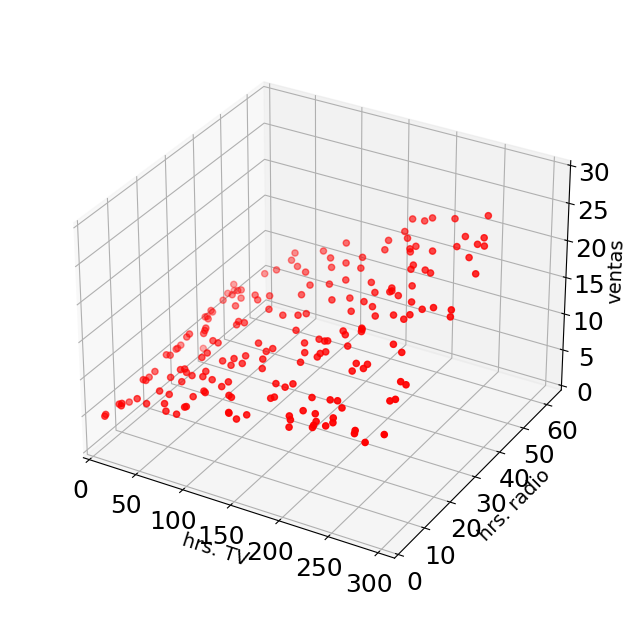

In [47]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
# datos
ax.scatter(x_tv, x_rd, y, color='r')
# formato
ax.set_xlabel('hrs. TV', fontsize=14)
ax.set_ylabel('hrs. radio', fontsize=14)
ax.set_zlabel('ventas', fontsize=14)
ax.set_xlim([ 0, 310 ])
ax.set_ylim([ 0, 65 ])
ax.set_zlim([ 0, 30 ])
ax.set_box_aspect(aspect=None, zoom=0.9)

plt.show()

Modelamos la relación como una función afín
$$
    y_{\text{sales},i} \approx \beta_0 + \beta_1 x_{\text{TV},i} + \beta_2 x_{\text{radio},i}.
$$


In [48]:
# numero de variables
n = 3
# matriz de coeficientes
A = np.zeros((m, n))
# 1ra columna:  factor constante
A[:, 0] = 1
# 2da columna:  x_tv
A[:, 1] = x_tv
# 3ra columna:  x_rd
A[:, 2] = x_rd

In [51]:
beta, residuo = LS_viaQR(A,y)
print('Coeficientes:')
print(beta)
print('Residuo:')
print(residuo**2)

Coeficientes:
[2.92109991 0.04575482 0.18799423]
Residuo:
556.9139800676181


Una vez resuelto, podemos estudiar las predicciones del modelo.

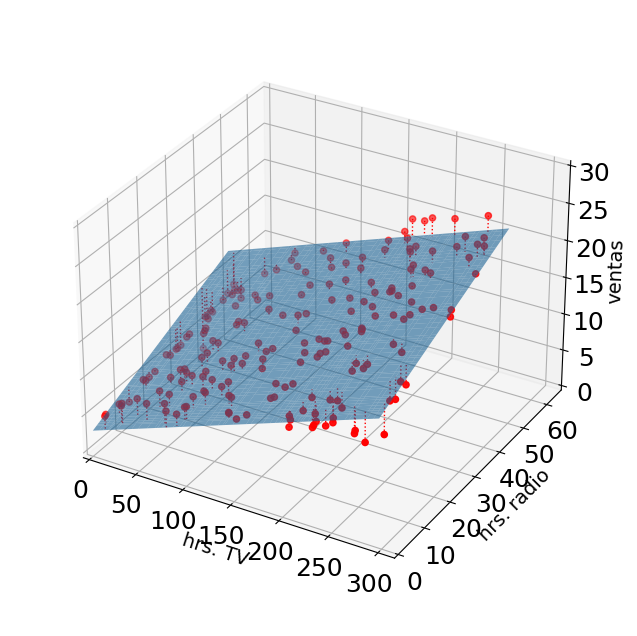

In [52]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
# datos
ax.scatter(x_tv, x_rd, y, color='r')
# prediccion
[ m_tv, m_rd ] = np.meshgrid(np.sort(x_tv), np.sort(x_rd)) 
ax.plot_surface(m_tv, m_rd, beta[0] + beta[1] * m_tv + beta[2] * m_rd, alpha=0.6)
# residuo
for _x_tv, _x_rd, _y in zip(x_tv, x_rd, y):
    ax.plot([_x_tv, _x_tv], [_x_rd, _x_rd], [_y, beta[0] + beta[1] * _x_tv + beta[2] * _x_rd], color='r', linewidth=1, linestyle=':')
# formato
ax.set_xlabel('hrs. TV', fontsize=14)
ax.set_ylabel('hrs. radio', fontsize=14)
ax.set_zlabel('ventas', fontsize=14)
ax.set_xlim([ 0, 310 ])
ax.set_ylim([ 0, 65 ])
ax.set_zlim([ 0, 30 ])
ax.set_box_aspect(aspect=None, zoom=0.9)

plt.show()

El modelo afín no captura bien el comportamiento de los datos cuando los predictores están cerca de sus valores extremos. Proponemos el siguiente modelo
$$
    y_{\text{sales},i} \approx \beta_0 + \beta_1 x_{\text{TV},i} + \beta_2 x_{\text{radio},i} + \beta_3 x_{\text{TV},i}x_{\text{radio},i} 
$$
que incorpora interacciones entre las variables a través del producto de los valores de los regresores.

In [53]:
# numero de variables
n = 4
# matriz de coeficientes
A = np.zeros((m, n))
# 1ra columna:  factor constante
A[:, 0] = 1
# 2da columna:  x_tv
A[:, 1] = x_tv
# 3ra columna:  x_rd
A[:, 2] = x_rd
# 4ta columna:  x_tv x_rd
A[:, 3] = x_tv * x_rd

Resolvemos el sistema.

In [54]:
beta, residuo = LS_viaQR(A,y)
print('Coeficientes:')
print(beta)
print('Residuo:')
print(residuo**2)

Coeficientes:
[6.75022020e+00 1.91010738e-02 2.88603399e-02 1.08649470e-03]
Residuo:
174.48338262772714


Estudiamos las predicciones del modelo.

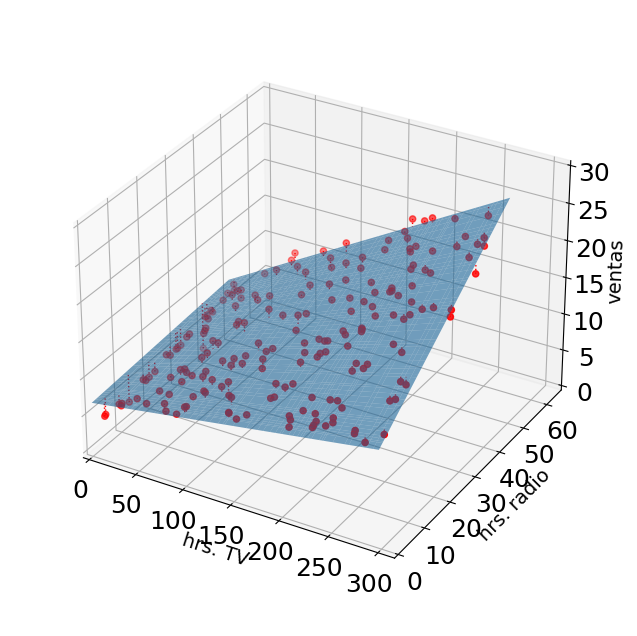

In [55]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
# datos
ax.scatter(x_tv, x_rd, y, color='r')
# prediccion
[ m_tv, m_rd ] = np.meshgrid(np.sort(x_tv), np.sort(x_rd)) 
ax.plot_surface(m_tv, m_rd, beta[0] + beta[1] * m_tv + beta[2] * m_rd + beta[3] * m_tv * m_rd, alpha=0.6)
# residuo
for _x_tv, _x_rd, _y in zip(x_tv, x_rd, y):
    ax.plot([_x_tv, _x_tv], [_x_rd, _x_rd], [_y, beta[0] + beta[1] * _x_tv + beta[2] * _x_rd + beta[3] * _x_tv * _x_rd ], color='r', linewidth=1, linestyle=':')
# formato
ax.set_xlabel('hrs. TV', fontsize=14)
ax.set_ylabel('hrs. radio', fontsize=14)
ax.set_zlabel('ventas', fontsize=14)
ax.set_xlim([ 0, 310 ])
ax.set_ylim([ 0, 65 ])
ax.set_zlim([ 0, 30 ])
ax.set_box_aspect(aspect=None, zoom=0.9)

plt.show()

## Ejemplo: mejor aproximacion

En algunos problemas en altas dimensiones, observamos una señal del tiempo que deseamos aproximar usando algunas funciones conocidas. Consideramos en este caso una señal dada por la expresión
$$
    s(t) = 2.5 t(1-t)\cos(2\pi (1.1 t + 0.5)^3)
$$
para $t\in [0, 1]$.

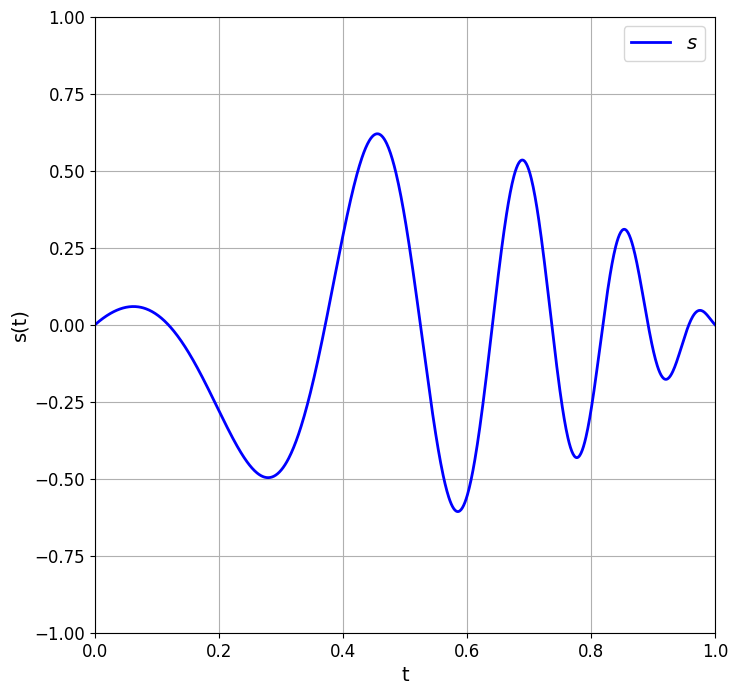

In [56]:
# función
s = lambda t : 2.5 * t * (1 - t) * np.cos(2 * np.pi * (1.1 * t + 0.5) ** 3)
# puntos de evaluacion
t = np.linspace(0, 1, 1000)

plt.figure(figsize=(8, 8))
plt.plot(t, s(t), label='$s$', linewidth=2, color='b')
plt.xlim([ 0.0, 1.0 ])
plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.ylabel('s(t)', fontsize=14)
plt.xlabel('t', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Para este problema, suponemos que queremos aproximar $s$ con funciones de la forma
$$
    \varphi_i(t) = \max(0, 1 - |t - i/n|)\quad \text{para}\quad i\in \{0,\ldots, n-1\}
$$
donde $n$ es relativamente pequeño. Supondremos que $n = 16$.

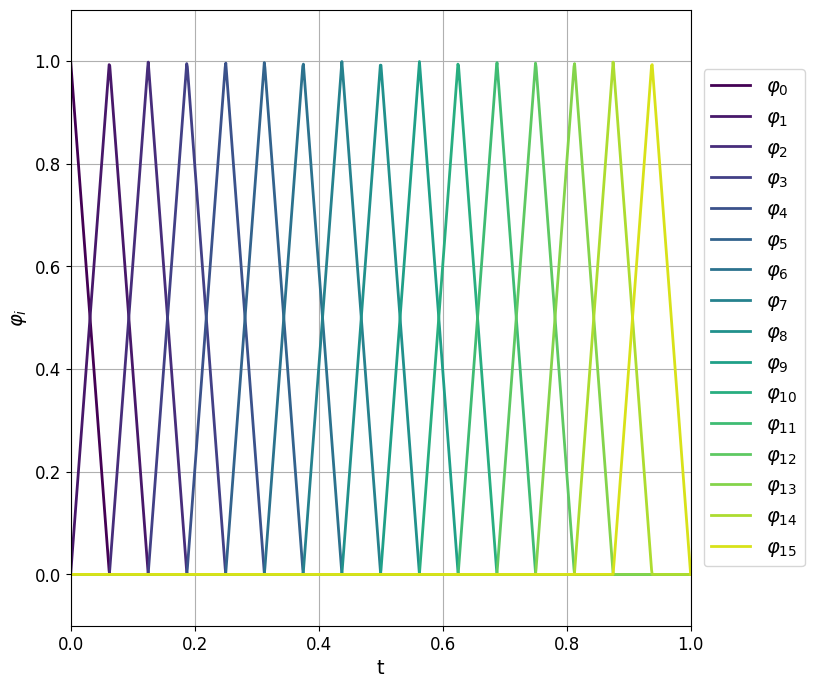

In [59]:
from matplotlib import colormaps as cm
# número de funciones
n = 16
# funciones
phi = lambda t, I : np.maximum(0.0, 1 - np.abs(n * t - I))

plt.figure(figsize=(8, 8))
for I in range(n):
    plt.plot(t, phi(t, I), linewidth=2, color=cm['viridis'](I/n), label='$\\varphi_{{{:d}}}$'.format(I))
plt.xlim([ 0.0, 1.0 ])
plt.ylim([ -0.1, +1.1 ])
plt.grid(True)
plt.ylabel('$\\varphi_i$', fontsize=14)
plt.legend(fontsize=14, loc='right', bbox_to_anchor=(1.2, 0.5))
plt.xlabel('t', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Nuestro objetivo es encontrar la mejor aproximación de $s$ usando las funciones $\varphi_0,\ldots, \varphi_{n-1}$. En otras palabras, buscamos $x_0,\ldots, x_{n-1}$ tales que
$$
    s(t) \approx x_0 \varphi_0(t) + \ldots + x_{n-1} \varphi_{n-1}(t)\quad\text{para}\quad t\in [0,1].
$$
Como criterio de ajuste, usamos la suma del cuadrado de los residuos en instantes de la forma
$$
    t_i = \frac{i}{m} \quad\text{con}\quad i\in\{0,\ldots, m-1\}
$$
donde $m$ es **mucho mayor** que $n$. En este problema consideramos $m = 2048$. Los residuos tienen la forma
$$
    r_i = s(i/m) - x_0 \varphi_0(i/m) + \ldots + x_{n-1} \varphi_{n-1}(i/m)
$$
de modo que deseamos escoger $x_0,\ldots, x_{n-1}$ de modo que
$$
    \sum_{i=0}^{m-1} r_i^2 = \sum_{i=0}^{m-1} (s(i/m) - x_0 \varphi_0(i/m) + \ldots + x_{n-1} \varphi_{n-1}(i/m))^2
$$
sea mínimo.

In [64]:
# observaciones
m = 2048
# observaciones
y = np.array([ s(I/m) for I in range(m) ], dtype=float)
A = np.vstack([ np.array([ phi(I/m, J) for I in range(m) ]) for J in range(n) ]).T

In [65]:
x, residuo = LS_viaQR(A,y)

print('Residuo:')
print(residuo**2)

Residuo:
11.539197438069156


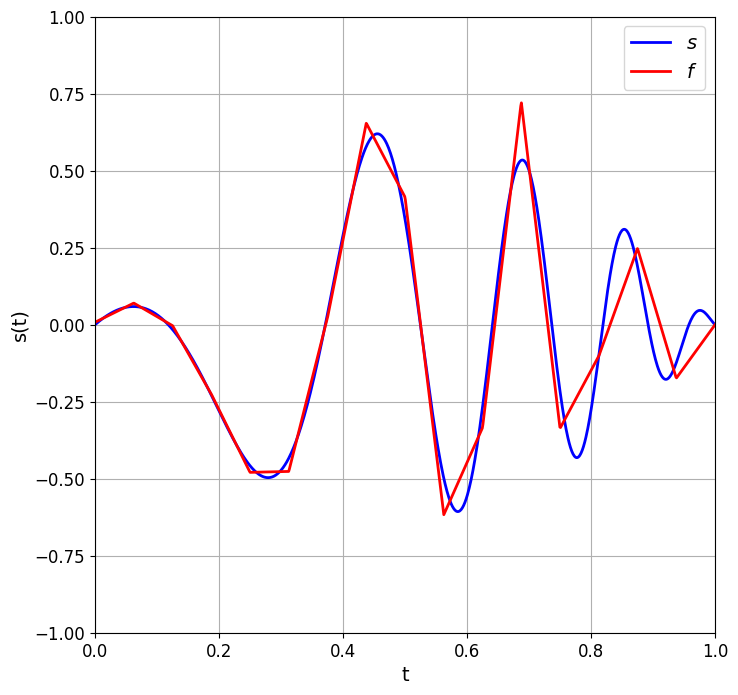

In [66]:
# puntos de evaluacion
t = np.linspace(0, 1, 1000)

# function aproximante
f = np.sum(np.vstack([ _x * phi(t, I) for I, _x in enumerate(x) ]), axis=0)

plt.figure(figsize=(8, 8))
plt.plot(t, s(t), label='$s$', linewidth=2, color='b')
plt.plot(t, f, label='$f$', linewidth=2, color='r')
plt.xlim([ 0.0, 1.0 ])
plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.ylabel('s(t)', fontsize=14)
plt.xlabel('t', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Minimos cuadrados multiples objetivos

In [70]:
def mols_solve(As,bs,lambdas):
    k = len(lambdas)
    Atil = np.vstack(np.sqrt(lambdas[i])*As[i] for i in range(k))
    btil = np.hstack(np.sqrt(lambdas[i])*bs[i] for i in range(k)).ravel() #ravel quick fix for shape compatibility
    return np.linalg.lstsq(Atil,btil)[0]

In [71]:
As = np.array([np.random.randn(10,5),np.random.randn(10,5)])
bs = np.array([np.random.randn(10),np.random.randn(10)])

In [73]:
N = 200
lambdas = 10**np.linspace(-4,4,200)
x,J1,J2 = np.zeros((5,N)), np.zeros(N), np.zeros(N)
for k in range(N):
    x[:,k] = mols_solve(As,bs,[1,lambdas[k]])
    J1[k] = np.square(np.linalg.norm(np.matmul(As[0],x[:,k]) - bs[0]))
    J2[k] = np.square(np.linalg.norm(np.matmul(As[1],x[:,k]) - bs[1]))

c:\users\manuel sánchez\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\manuel sánchez\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.
c:\users\manuel sánchez\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input mat

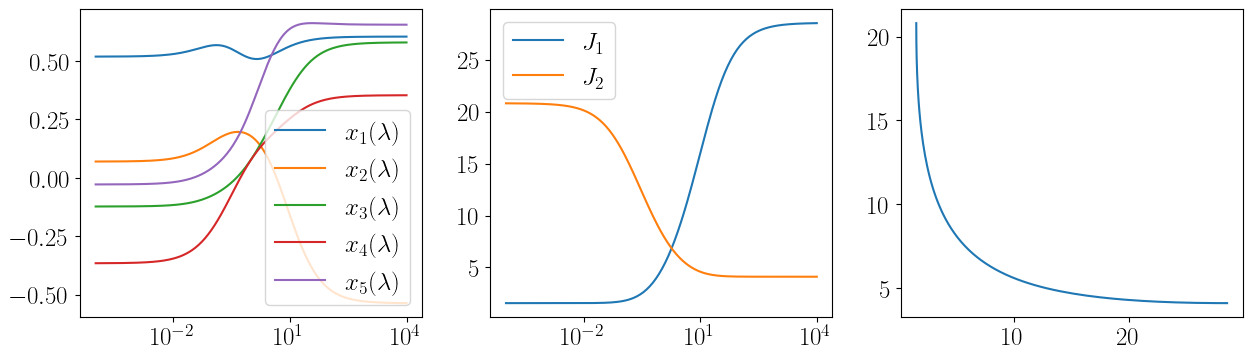

In [75]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
plt.rcParams['text.usetex'] = True

ax[0].semilogx(lambdas,x.T[:,0], label=r'$x_1(\lambda )$')
ax[0].semilogx(lambdas,x.T[:,1], label=r'$x_2(\lambda )$')
ax[0].semilogx(lambdas,x.T[:,2], label=r'$x_3(\lambda )$')
ax[0].semilogx(lambdas,x.T[:,3], label=r'$x_4(\lambda )$')
ax[0].semilogx(lambdas,x.T[:,4], label=r'$x_5(\lambda )$')
ax[1].semilogx(lambdas,J1, label=r'$J_1$')
ax[1].semilogx(lambdas,J2, label=r'$J_2$')
ax[2].plot(J1,J2)
ax[0].legend()
ax[1].legend()
plt.show()

## Ejemplo: denoising


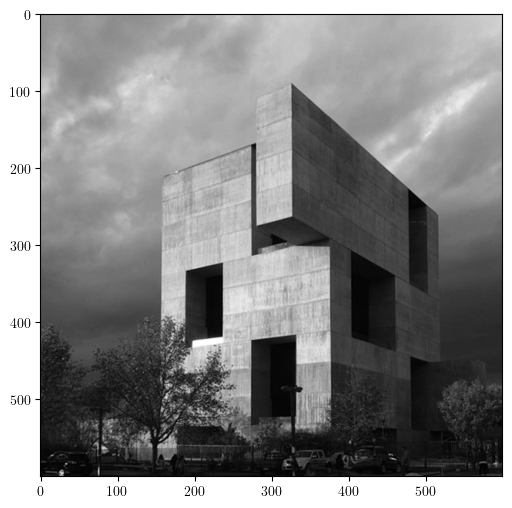

In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img = Image.open('edif_elemental.png')
imggray = img.convert('LA')
#plt.figure(figsize=(9, 6))
#plt.imshow(imggray);

# convert to matrix
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

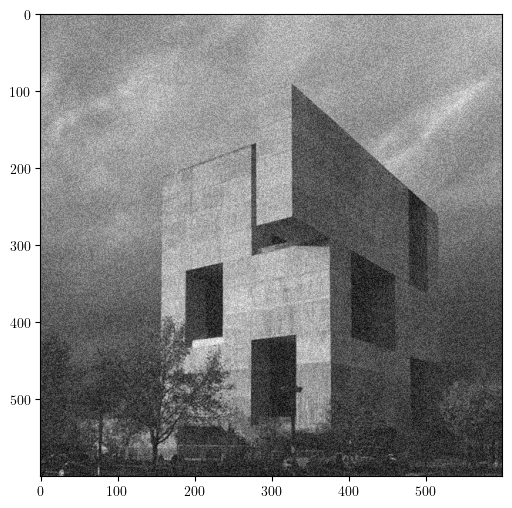

In [30]:
# Add noise
imgmat_vector = imgmat.reshape((imgmat.shape[0]**2,1))
imgmat_vector += 100*np.random.rand(imgmat.shape[0]**2,1)
imgmat_noise = imgmat_vector.reshape((imgmat.shape[0],imgmat.shape[1]))
plt.figure(figsize=(9,6))
plt.imshow(imgmat_noise, cmap='gray');

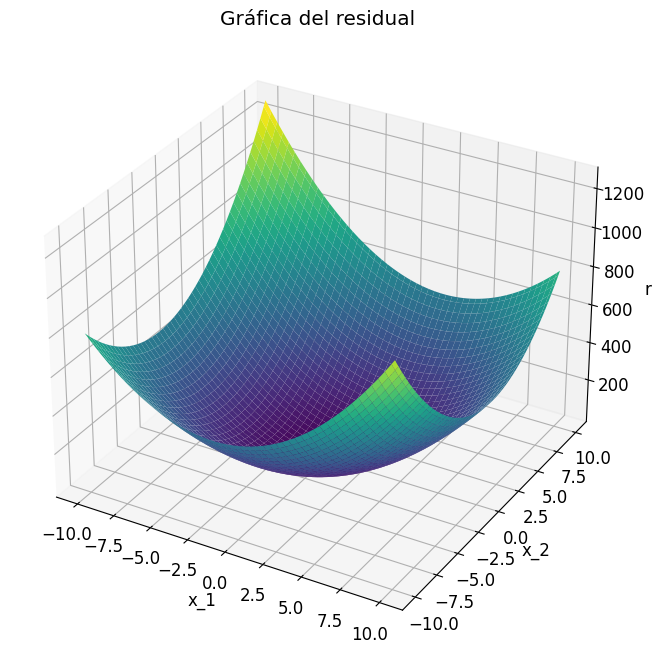

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 12})
# Definir la función
def f(x1, x2):
    return (1 - 2*x1)**2 + (x1 - x2)**2 + (-1 - 2*x2)**2

# Crear datos para la gráfica
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1, x2)
y = f(x1, x2)

# Graficar la función
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y, cmap='viridis')

# Etiquetas y título
ax.set_xlabel(r'x_1')
ax.set_ylabel(r'x_2')
ax.set_zlabel(r'r')
ax.set_title('Gráfica del residual')
fig.savefig('residualLS.png')
# Mostrar la gráfica
plt.show()


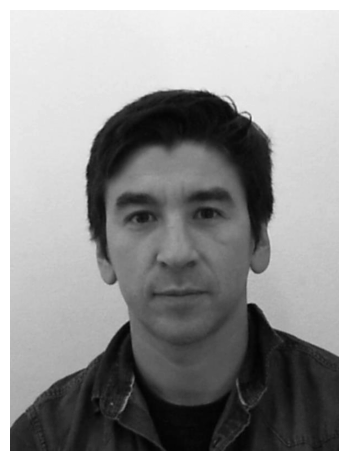

In [2]:
img = Image.open('Foto_1057448.jpg')
imggray = img.convert('LA')
# convert to matrix
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(5,5))
plt.imshow(imgmat, cmap='gray')
plt.tight_layout()
plt.axis('off')
# plt.savefig('fig2svdall.png')
plt.show()

In [3]:
imgmat.shape

(805, 600)

In [5]:
imggray.thumbnail((168, 192))

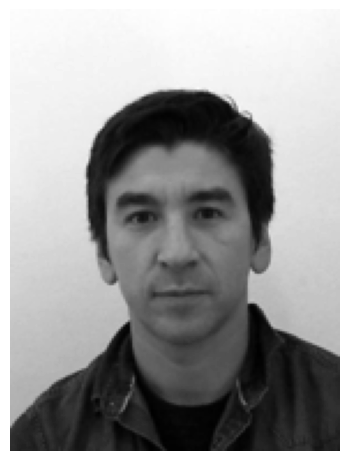

In [6]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(5,5))
plt.imshow(imgmat, cmap='gray')
plt.tight_layout()
plt.axis('off')
# plt.savefig('fig2svdall.png')
plt.show()